In [84]:
import numpy as np
from math import pi 
import scipy
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io.wavfile import write

# Question 1

In [85]:
f1 = 900 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

## Computing the filter parameters

In [86]:
r = np.exp(-b1*pi*T)
r

0.9614911598014075

In [87]:
theta = 2*pi*f1*T
theta

0.3534291735288517

## Pole zero plot of H(z)

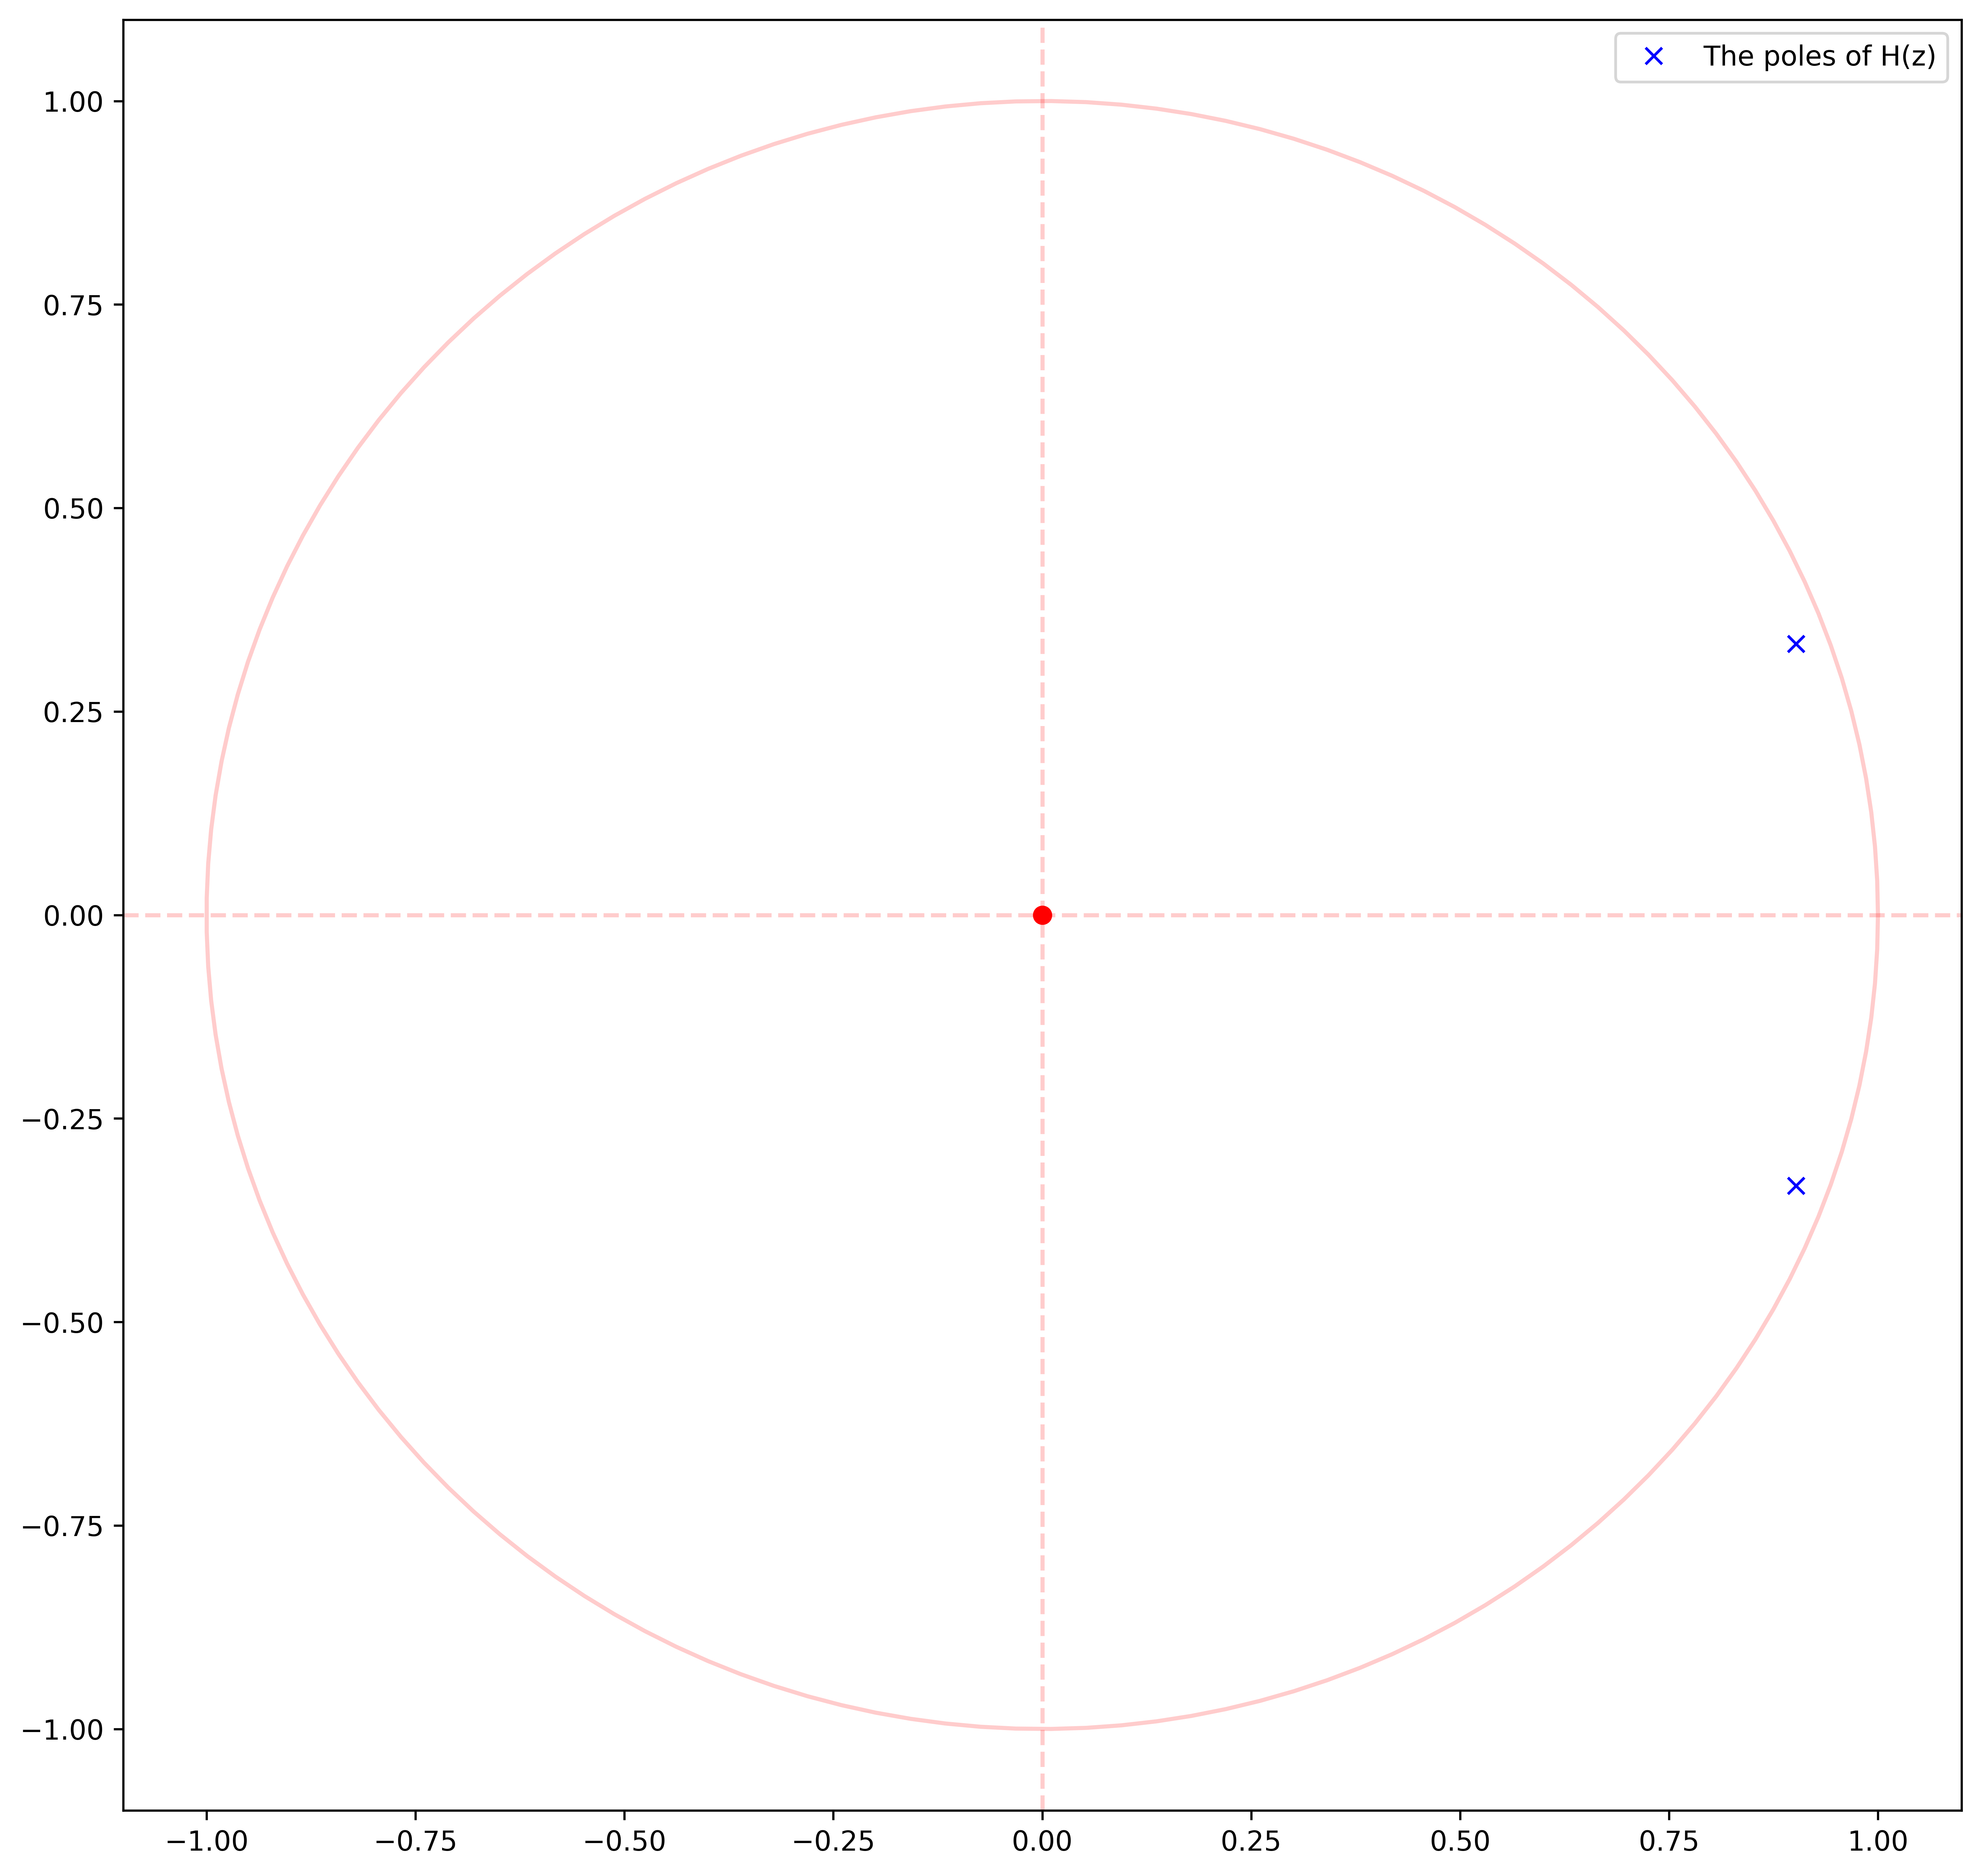

In [88]:
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(12, 12))
plt.plot(r*np.cos(theta), r*np.sin(theta), 'bx')
plt.plot(r*np.cos(-theta), r*np.sin(-theta), 'bx')
angle = np.linspace( 0 , 2 * np.pi , 150 ) 

radius = 1

x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
plt.plot(x, y, 'r', alpha = 0.2)

plt.axvline(0, c = 'r', ls='--', alpha=0.2)
plt.axhline(0, c = 'r', ls='--', alpha=0.2)
plt.plot(0, 0, 'ro')
plt.legend(["The poles of H(z)"])

## H(z)

In [89]:
def getFilterDenCoef(F1, B1, Fs):
    r, theta = np.exp(-b1*pi*T), 2*pi*f1*T
    return np.array([1, -2*r*np.cos(theta), r*r])

In [90]:
num = np.array([1])
den = getFilterDenCoef(f1, b1, fs)

### Displaying H(z)

In [91]:
s = "{a0} + {a1} z^-1 + {a2} z^-2".format(a0 = den[0], a1 = den[1], a2 = den[2])
print("H(z) = \n")
print(" "*(len(s)//2) + "1\n" + "-"*len(s)+"\n"+s)

H(z) = 

                            1
--------------------------------------------------------
1.0 + -1.8041253513834825 z^-1 + 0.9244652503762558 z^-2


In [92]:
w, h = scipy.signal.freqz(b=num, a=den, fs = fs)

## Magnitude (dB vs Frequency)

### From formula

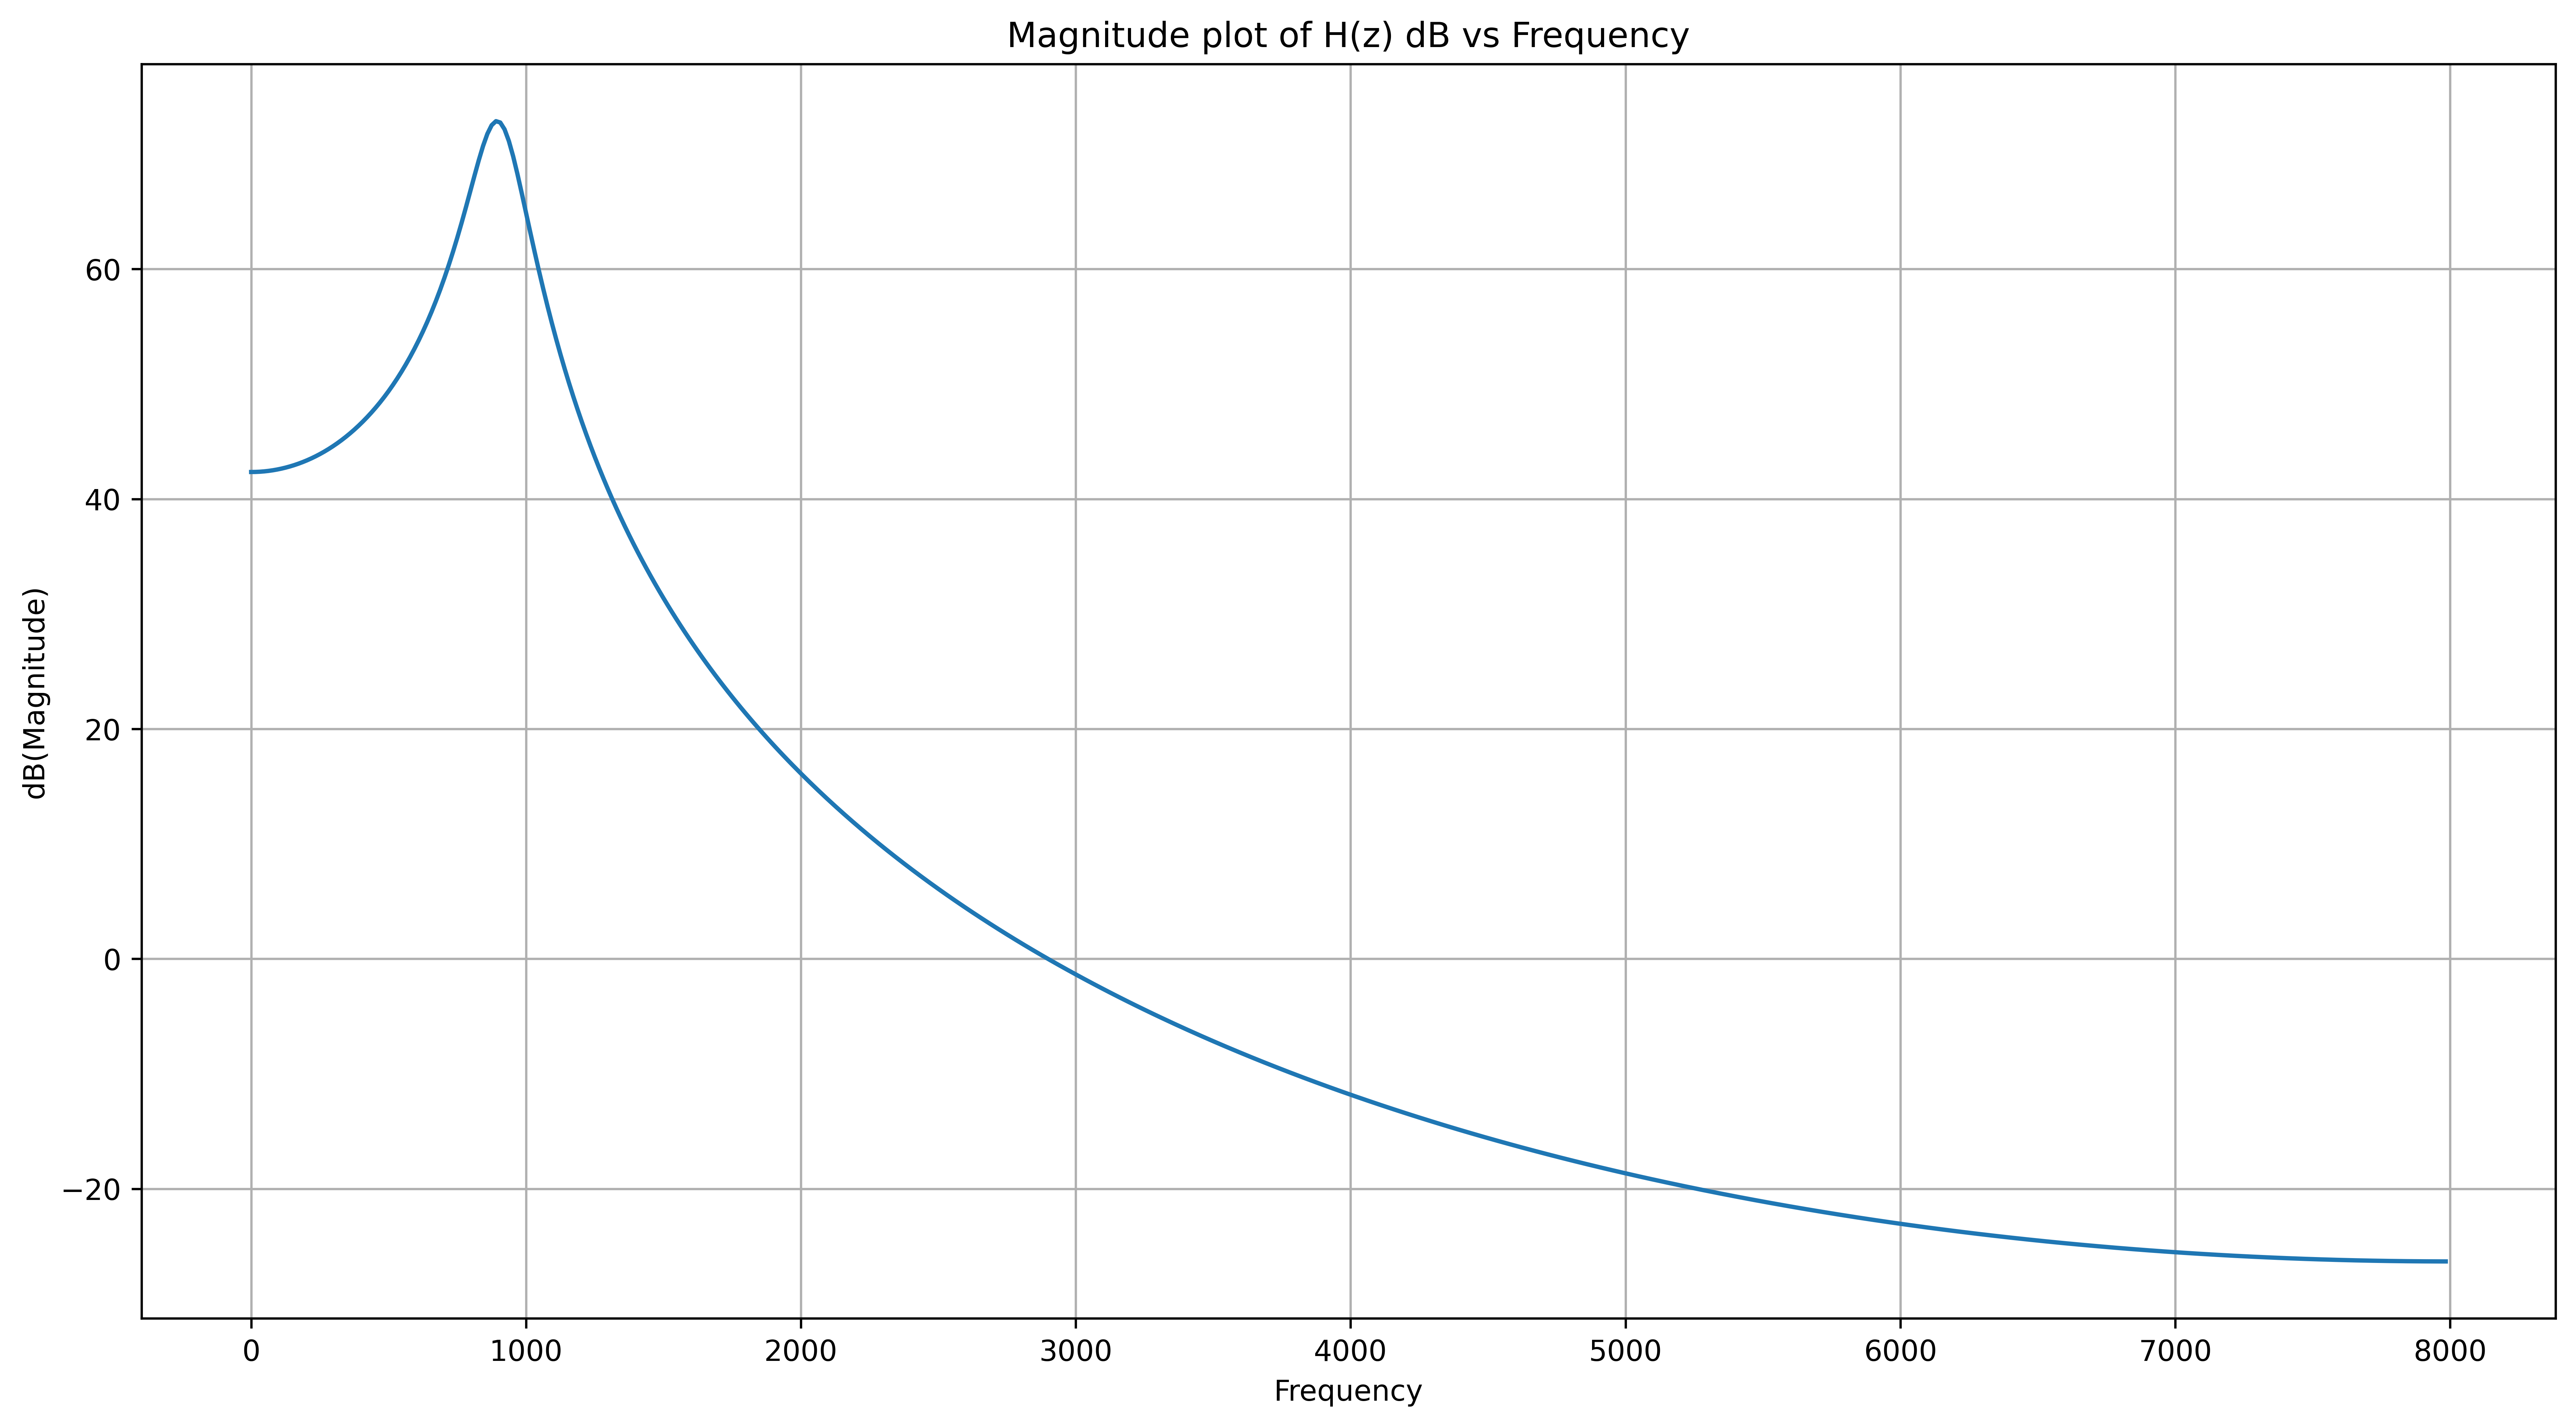

In [93]:
plt.figure(figsize=(15, 8))
plt.plot(w, 20*np.log(np.sqrt(h*np.conjugate(h))))
plt.xlabel("Frequency")
plt.ylabel("dB(Magnitude)")
plt.title("Magnitude plot of H(z) dB vs Frequency")
plt.grid(True)

### Using the scipy functions for magnitude response

In [94]:
w, mag, phase = scipy.signal.dbode((num, den, 1))

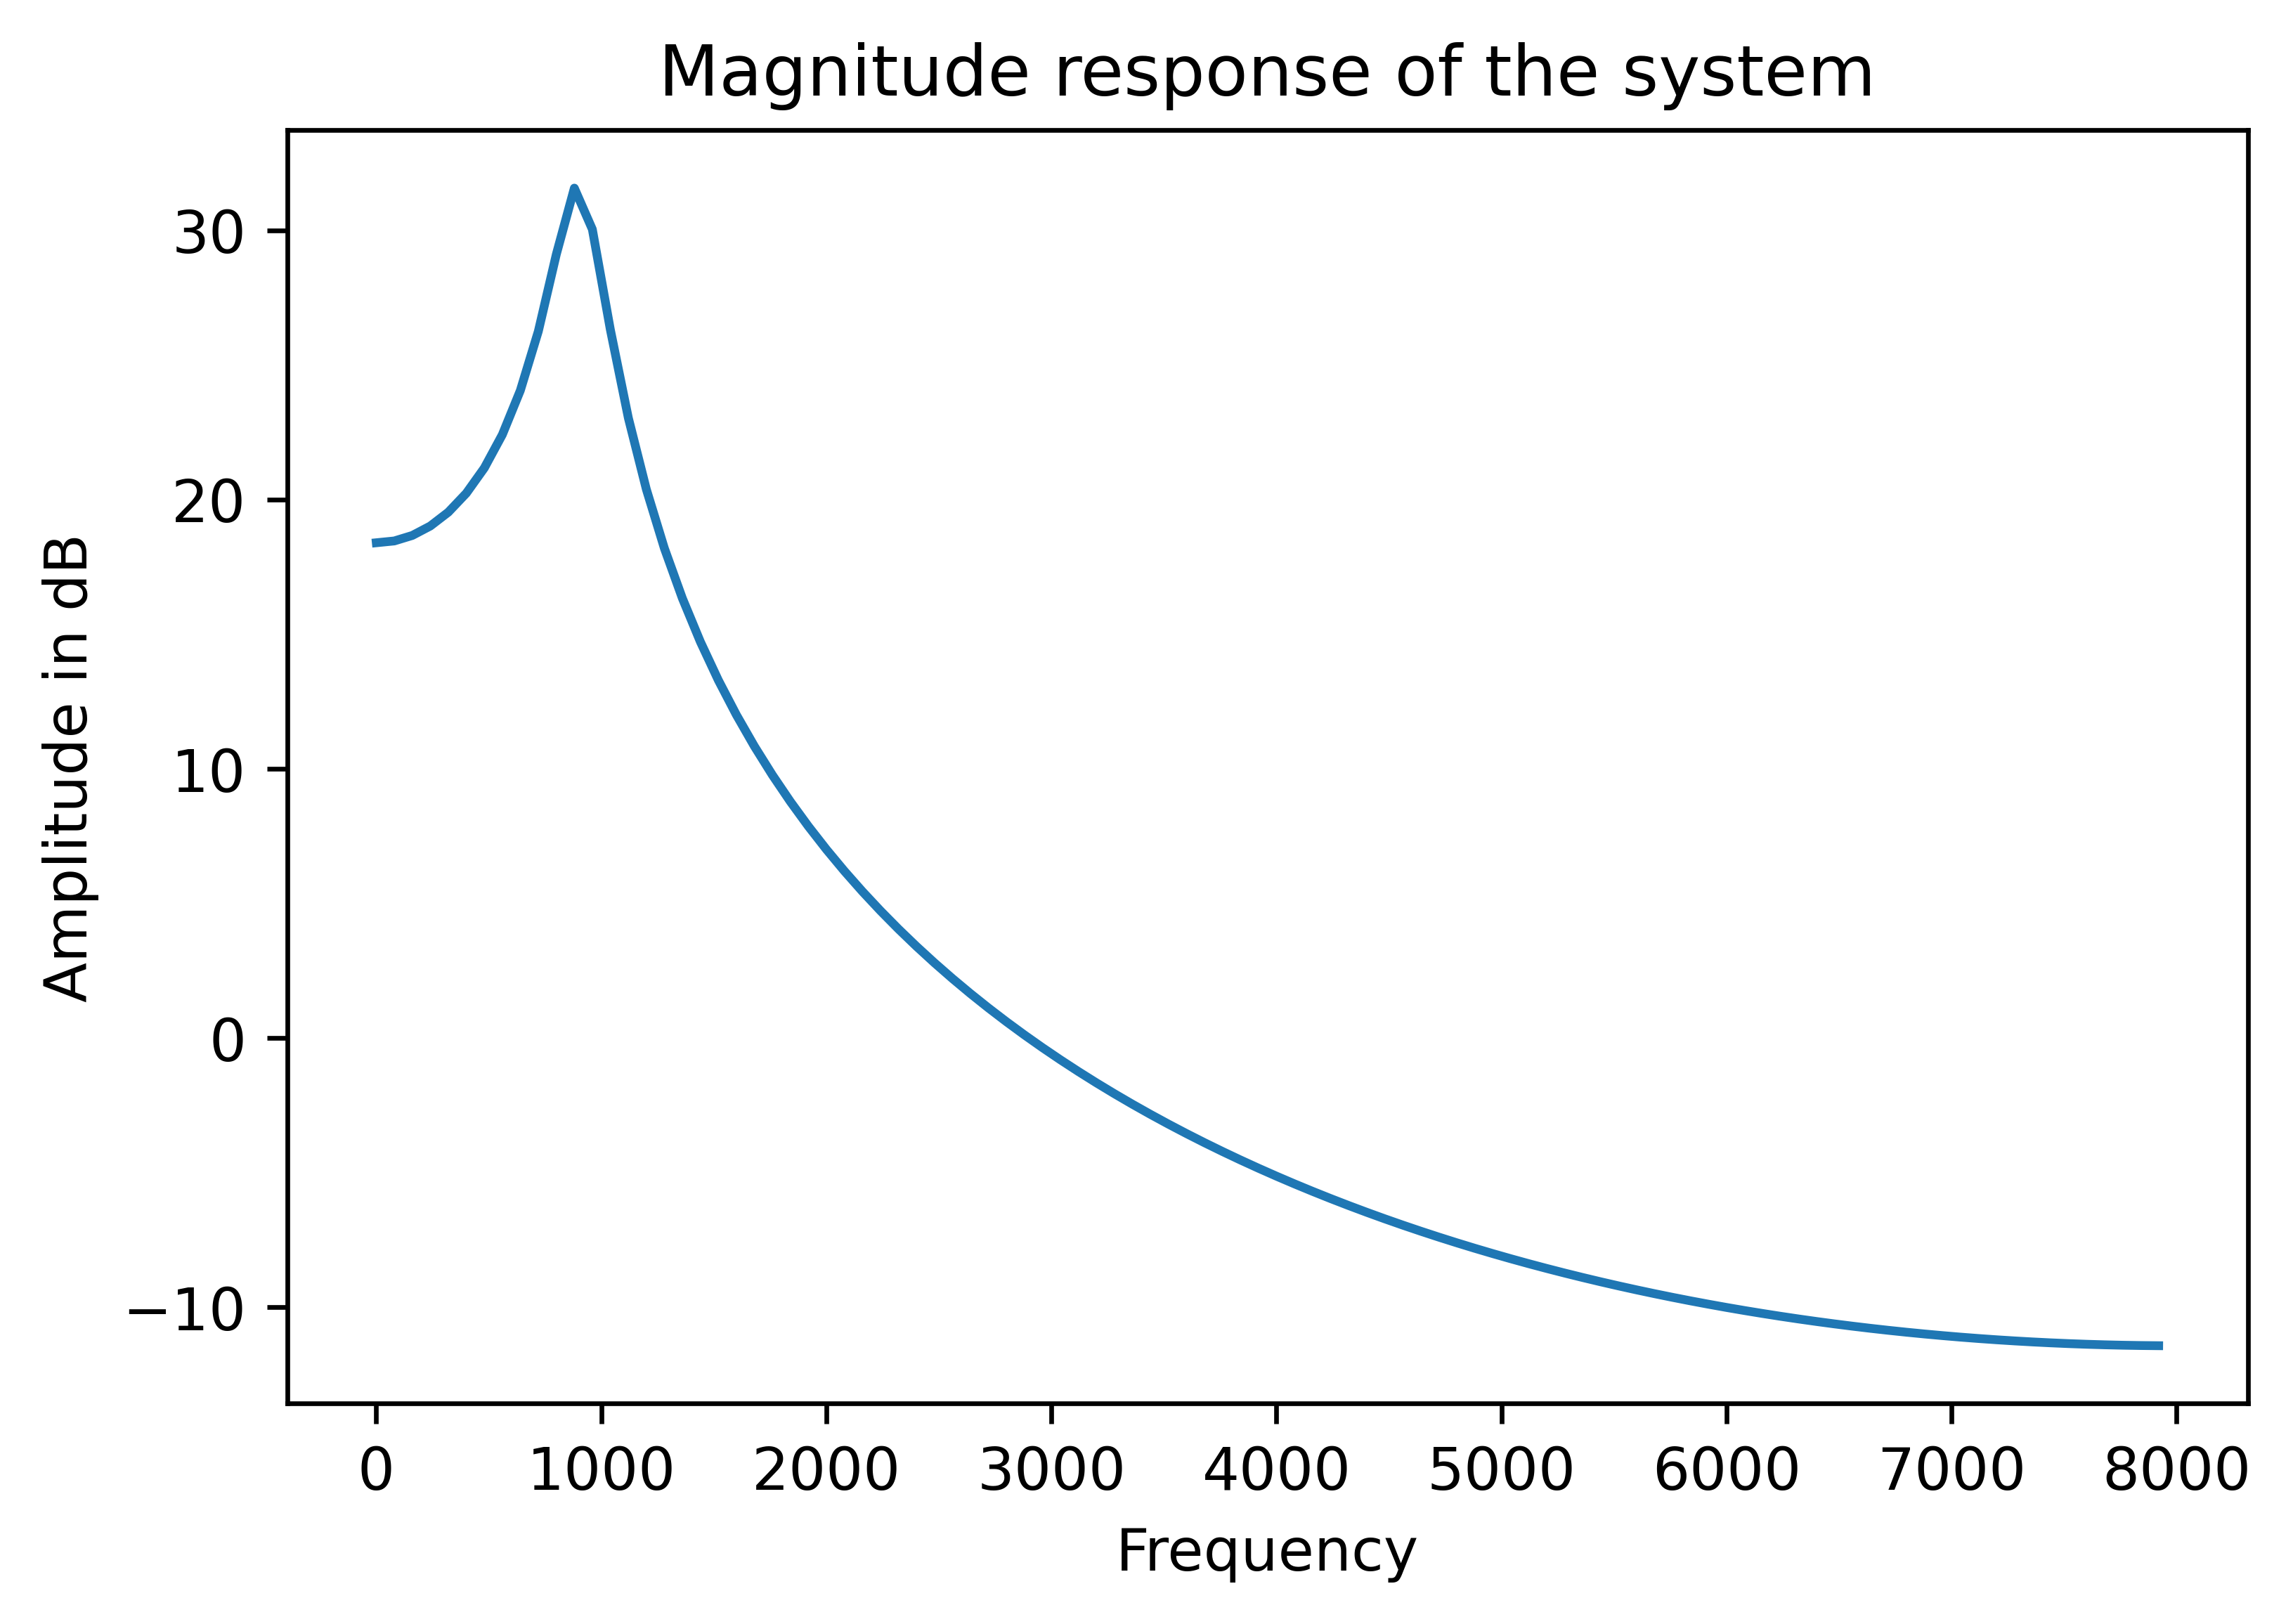

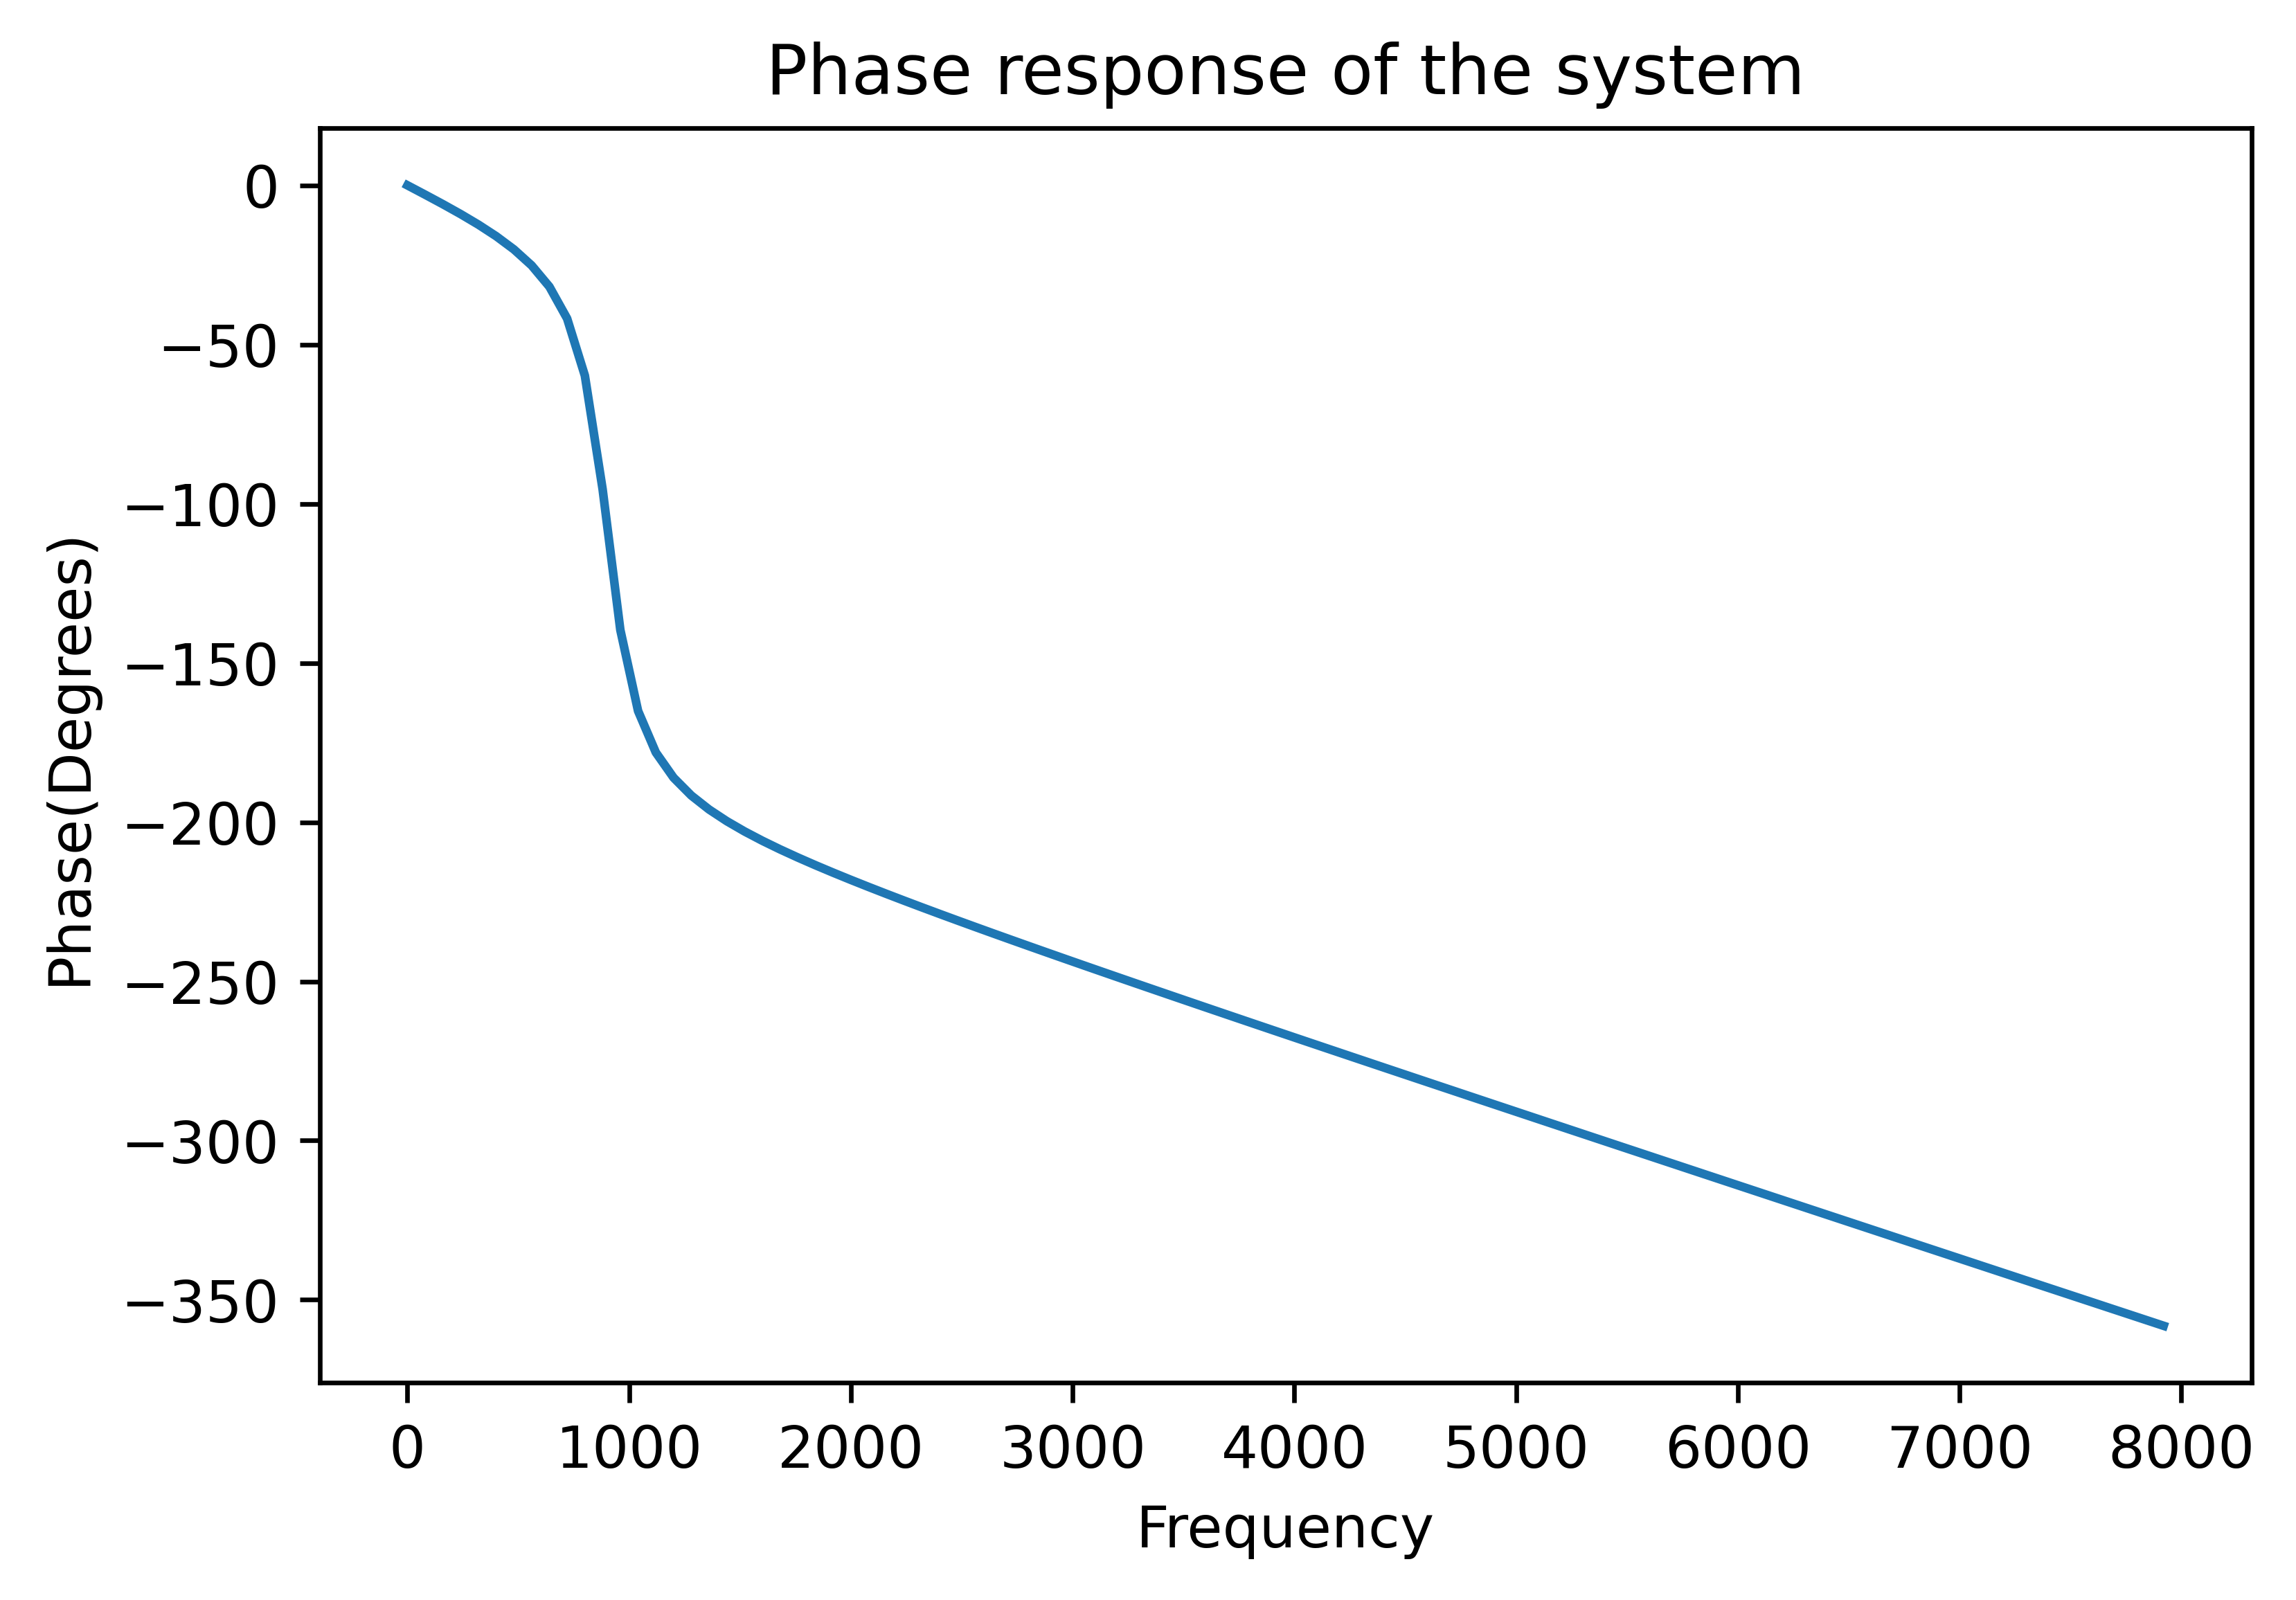

In [173]:
plt.figure()
plt.plot(w*fs/(2*pi), mag)    # Bode magnitude plot
plt.xlabel("Frequency")
plt.ylabel("Amplitude in dB")
plt.title("Magnitude response of the system")
plt.figure()
plt.plot(w*fs/(2*pi), phase)  # Bode phase plot
plt.xlabel("Frequency")
plt.ylabel("Phase(Degrees)")
plt.title("Phase response of the system")
plt.show()

## Impulse response

In [181]:
def computeImpRes(ini, samples, r, theta):
    #computing the impulse response from the difference equations
    y = np.zeros((samples, 1))
    y[0], y[1], y[2] = ini
    for i in range(3, samples):
        y[i] = 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [182]:
yImp = computeImpRes([1, 2*r*np.cos(theta), 4*r*r*np.cos(theta)*np.cos(theta) - r*r], 200, r, theta)

Text(0.5, 1.0, 'Impulse response in time domain')

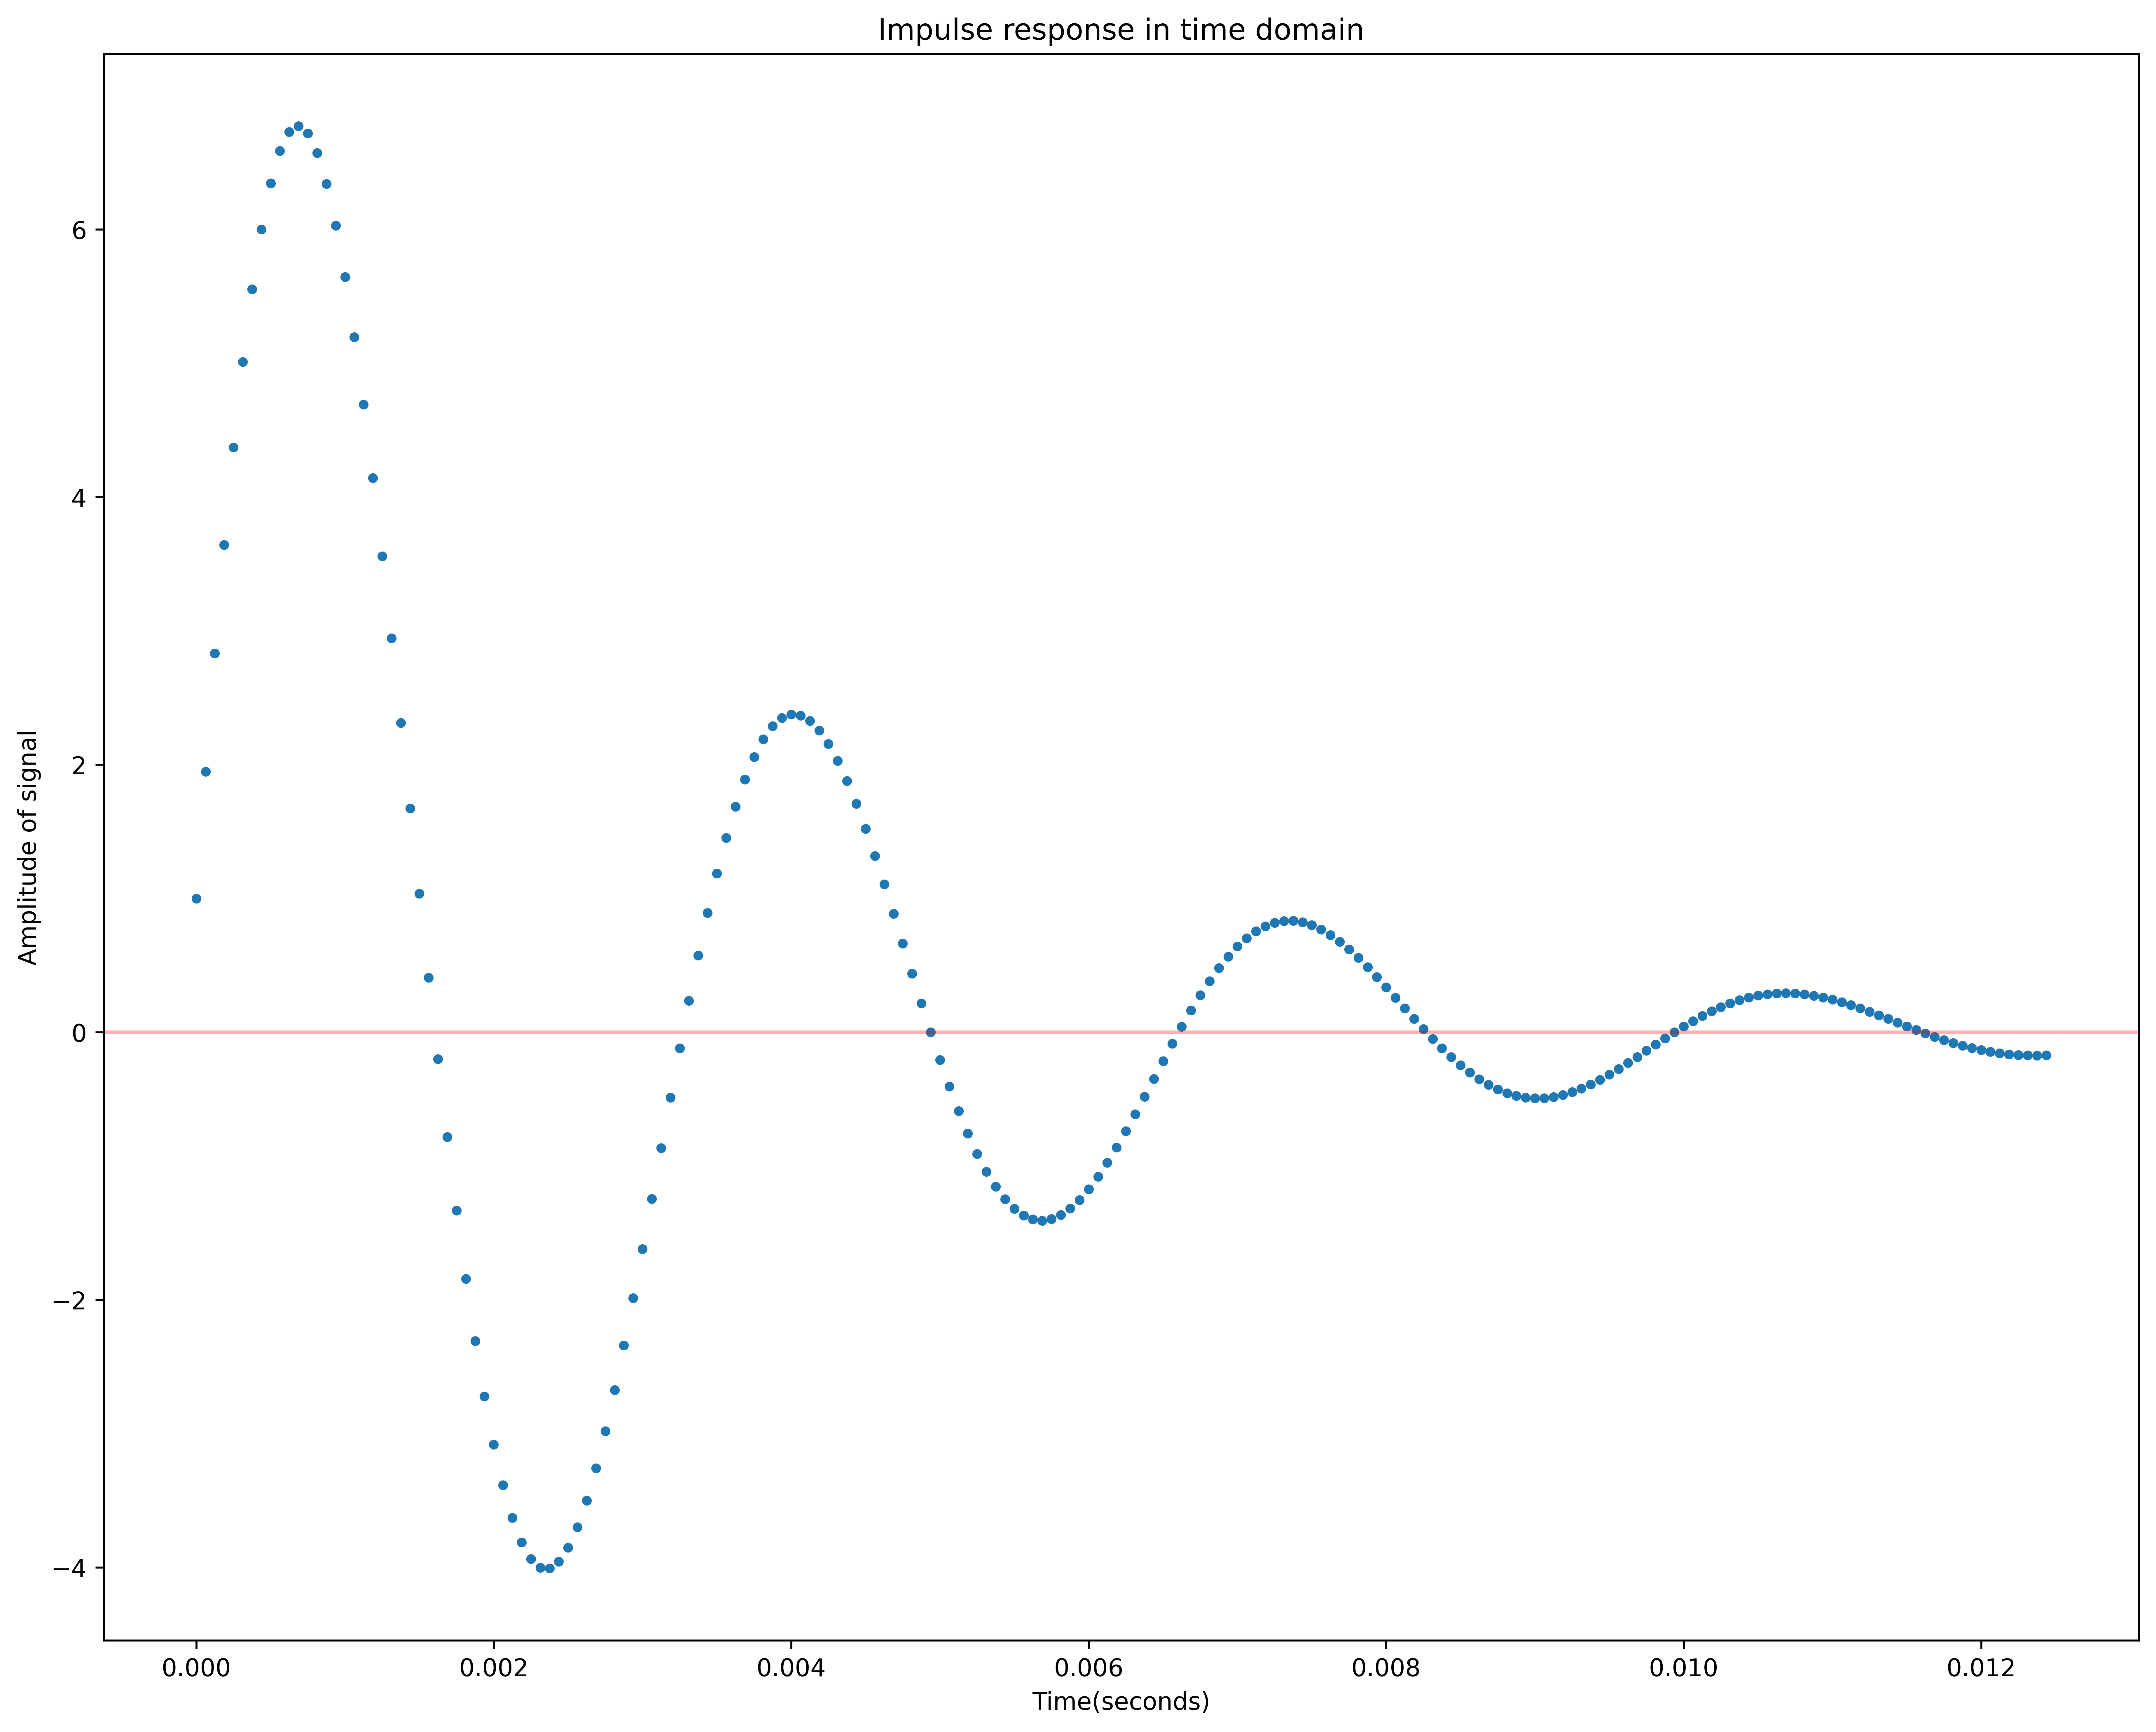

In [183]:
plt.figure(figsize=(15, 12))
t = [i/fs for i in range(len(yImp))]
plt.plot(t, yImp, '.')
plt.axhline(0, c = 'r', alpha=0.3)
plt.xlabel("Time(seconds)")
plt.ylabel("Amplitude of signal")
plt.title("Impulse response in time domain")

# Question 2

In [218]:
f1 = 900 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [219]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

In [220]:
F0 = 160
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0 ##approximating location of the peaks of the triangular impulse train
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [221]:
def computeResponse(x, samples, r, theta):
    #computing the impulse response from the difference equations
    assert x.shape[0]==samples
    y = np.zeros((samples, 1))
    y[0] = x[0] #assumed casual
    y[1] = x[1] + 2*r*np.cos(theta)*y[0]
    y[2] = x[2] + 2*r*np.cos(theta)*y[1] - r*r*y[0]
    for i in range(3, samples):
        y[i] = x[i] + 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [222]:
def triagInput(P, samples, width = 4, start = 0):
    #start = {0, 1} whether to start at 0 or the next non-zero sample
    x = np.zeros((samples, 1))
    peaks= []
    for i in range(start, samples+start):
        if i%P==0:
            x[i] = 1 #populating the peaks
            peaks.append(i)
    for j in peaks:
        for k in range(width):
            if j-k>=0:
                x[j-k] = 1 - (k/width)
            if j+k<samples:
                x[j+k] = 1 - (k/width)
    return x



Text(0.5, 1.0, 'System output of source-filter')

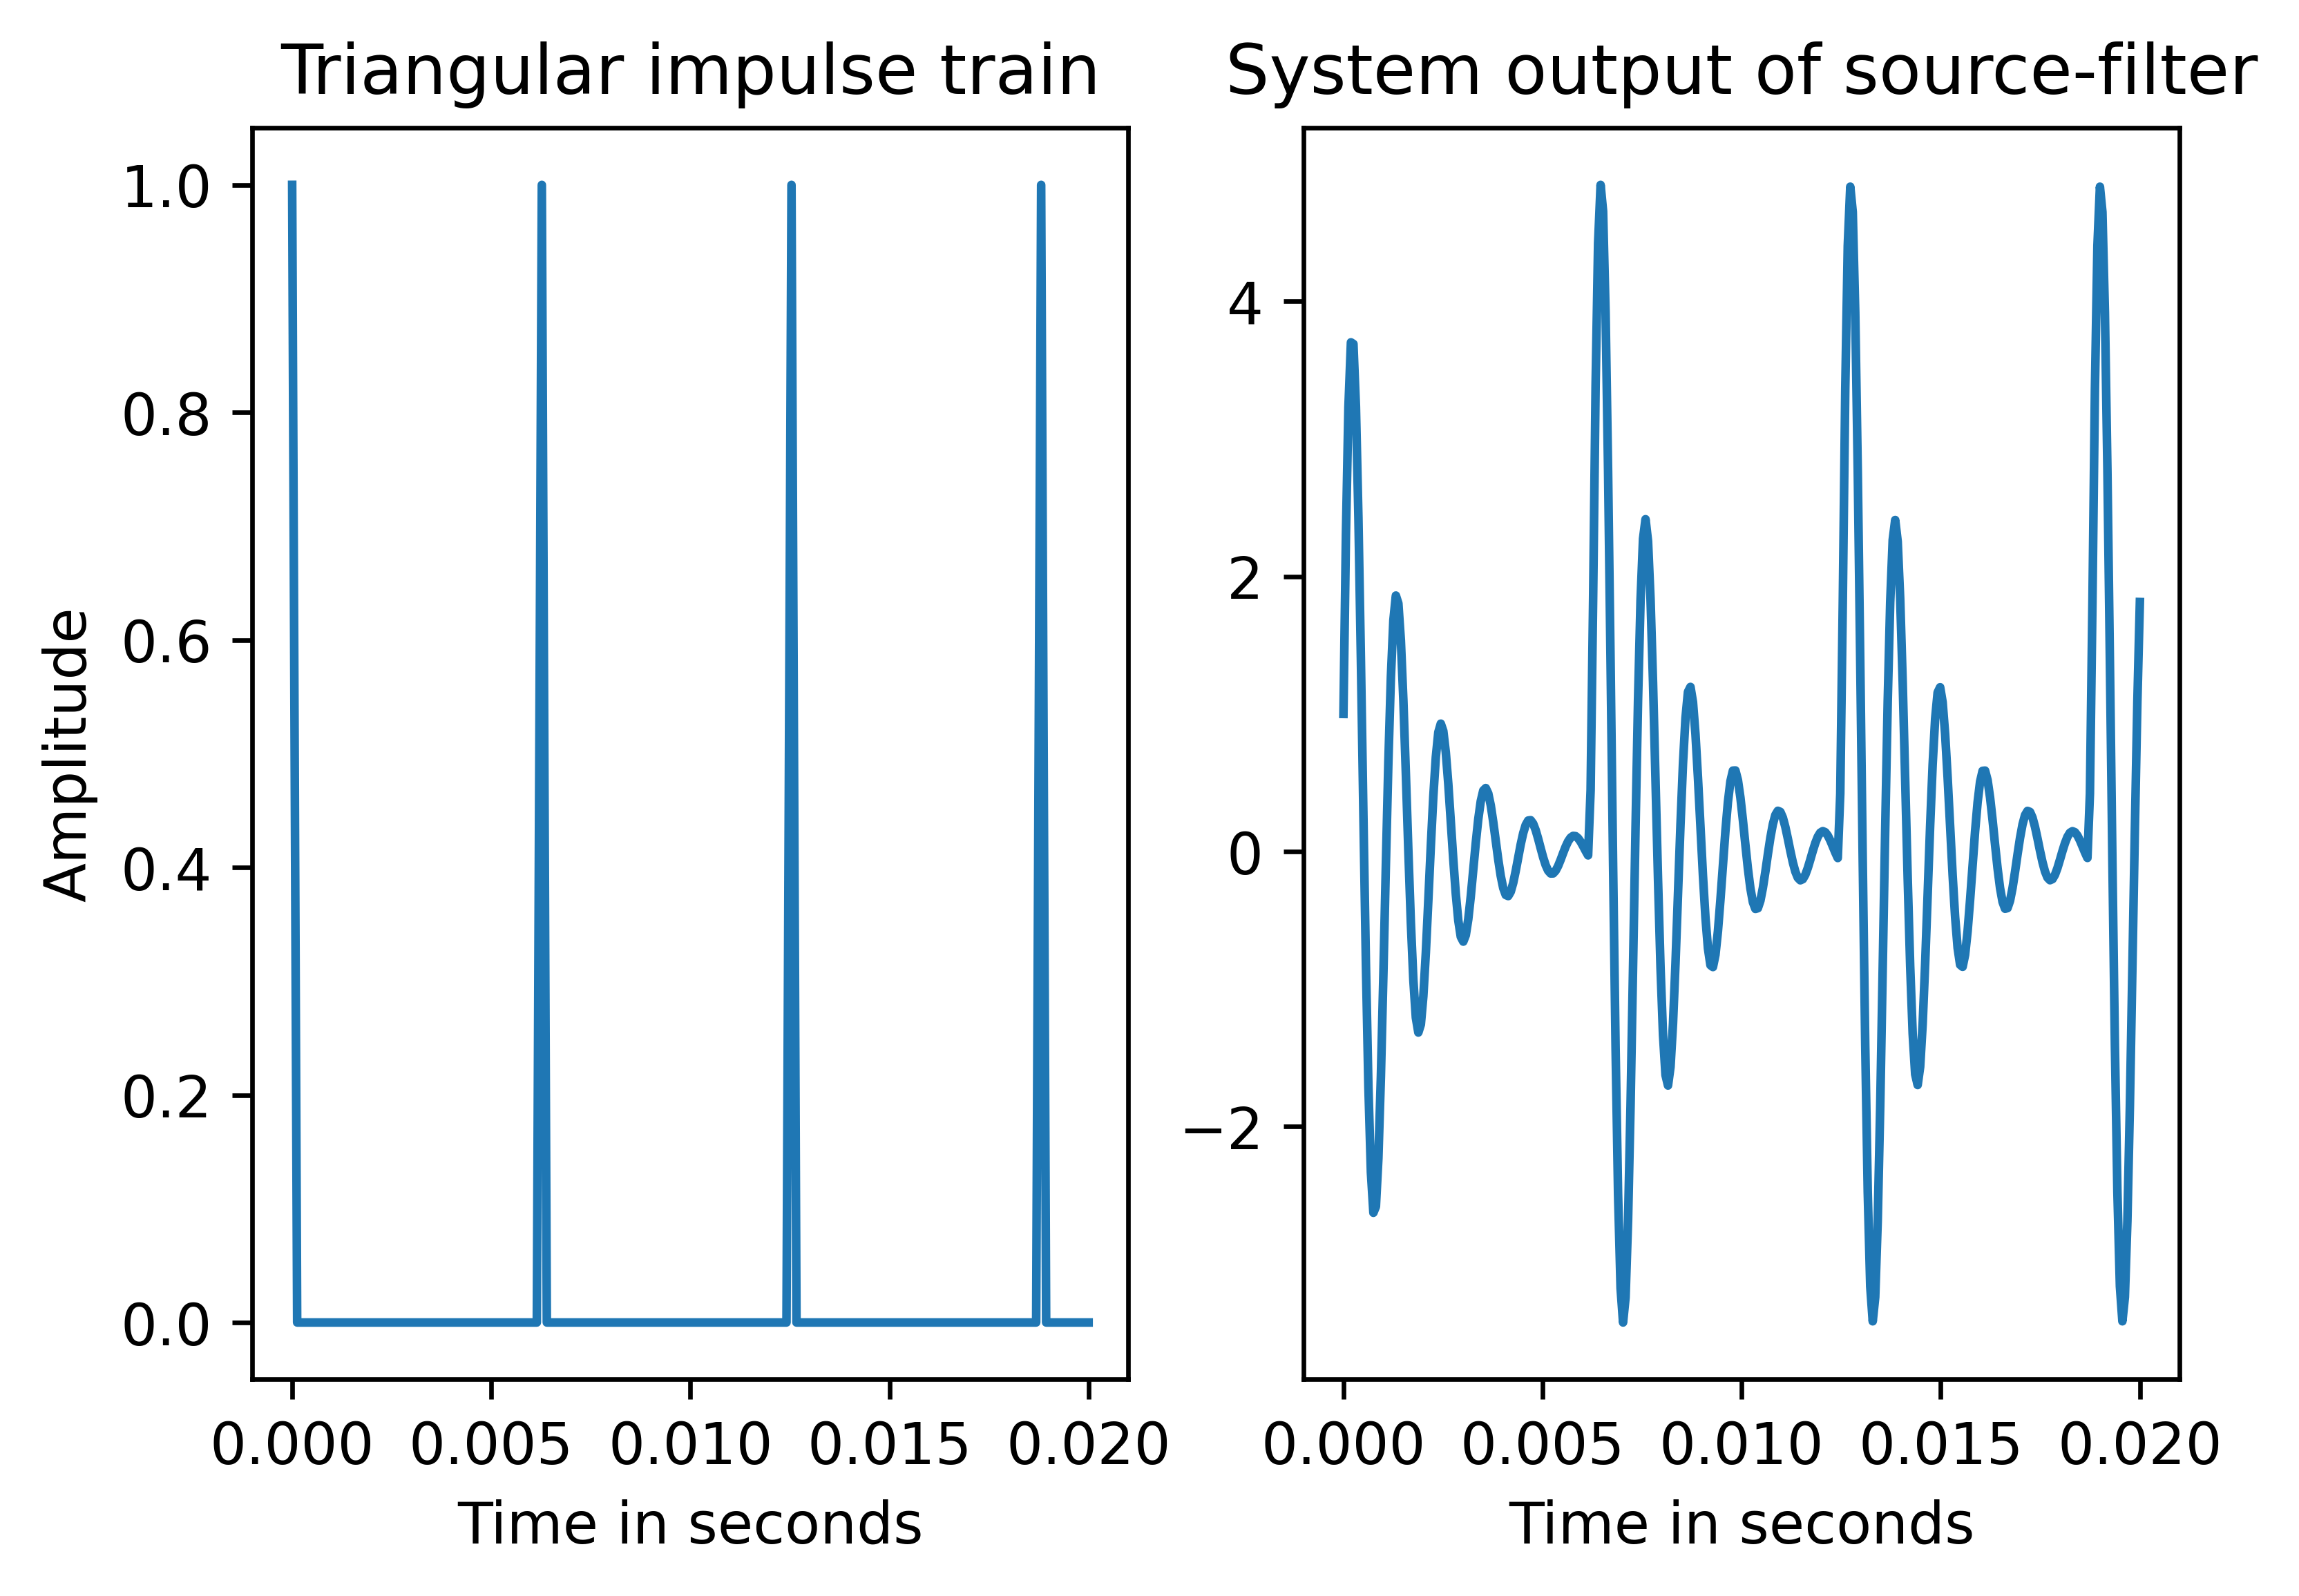

In [223]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

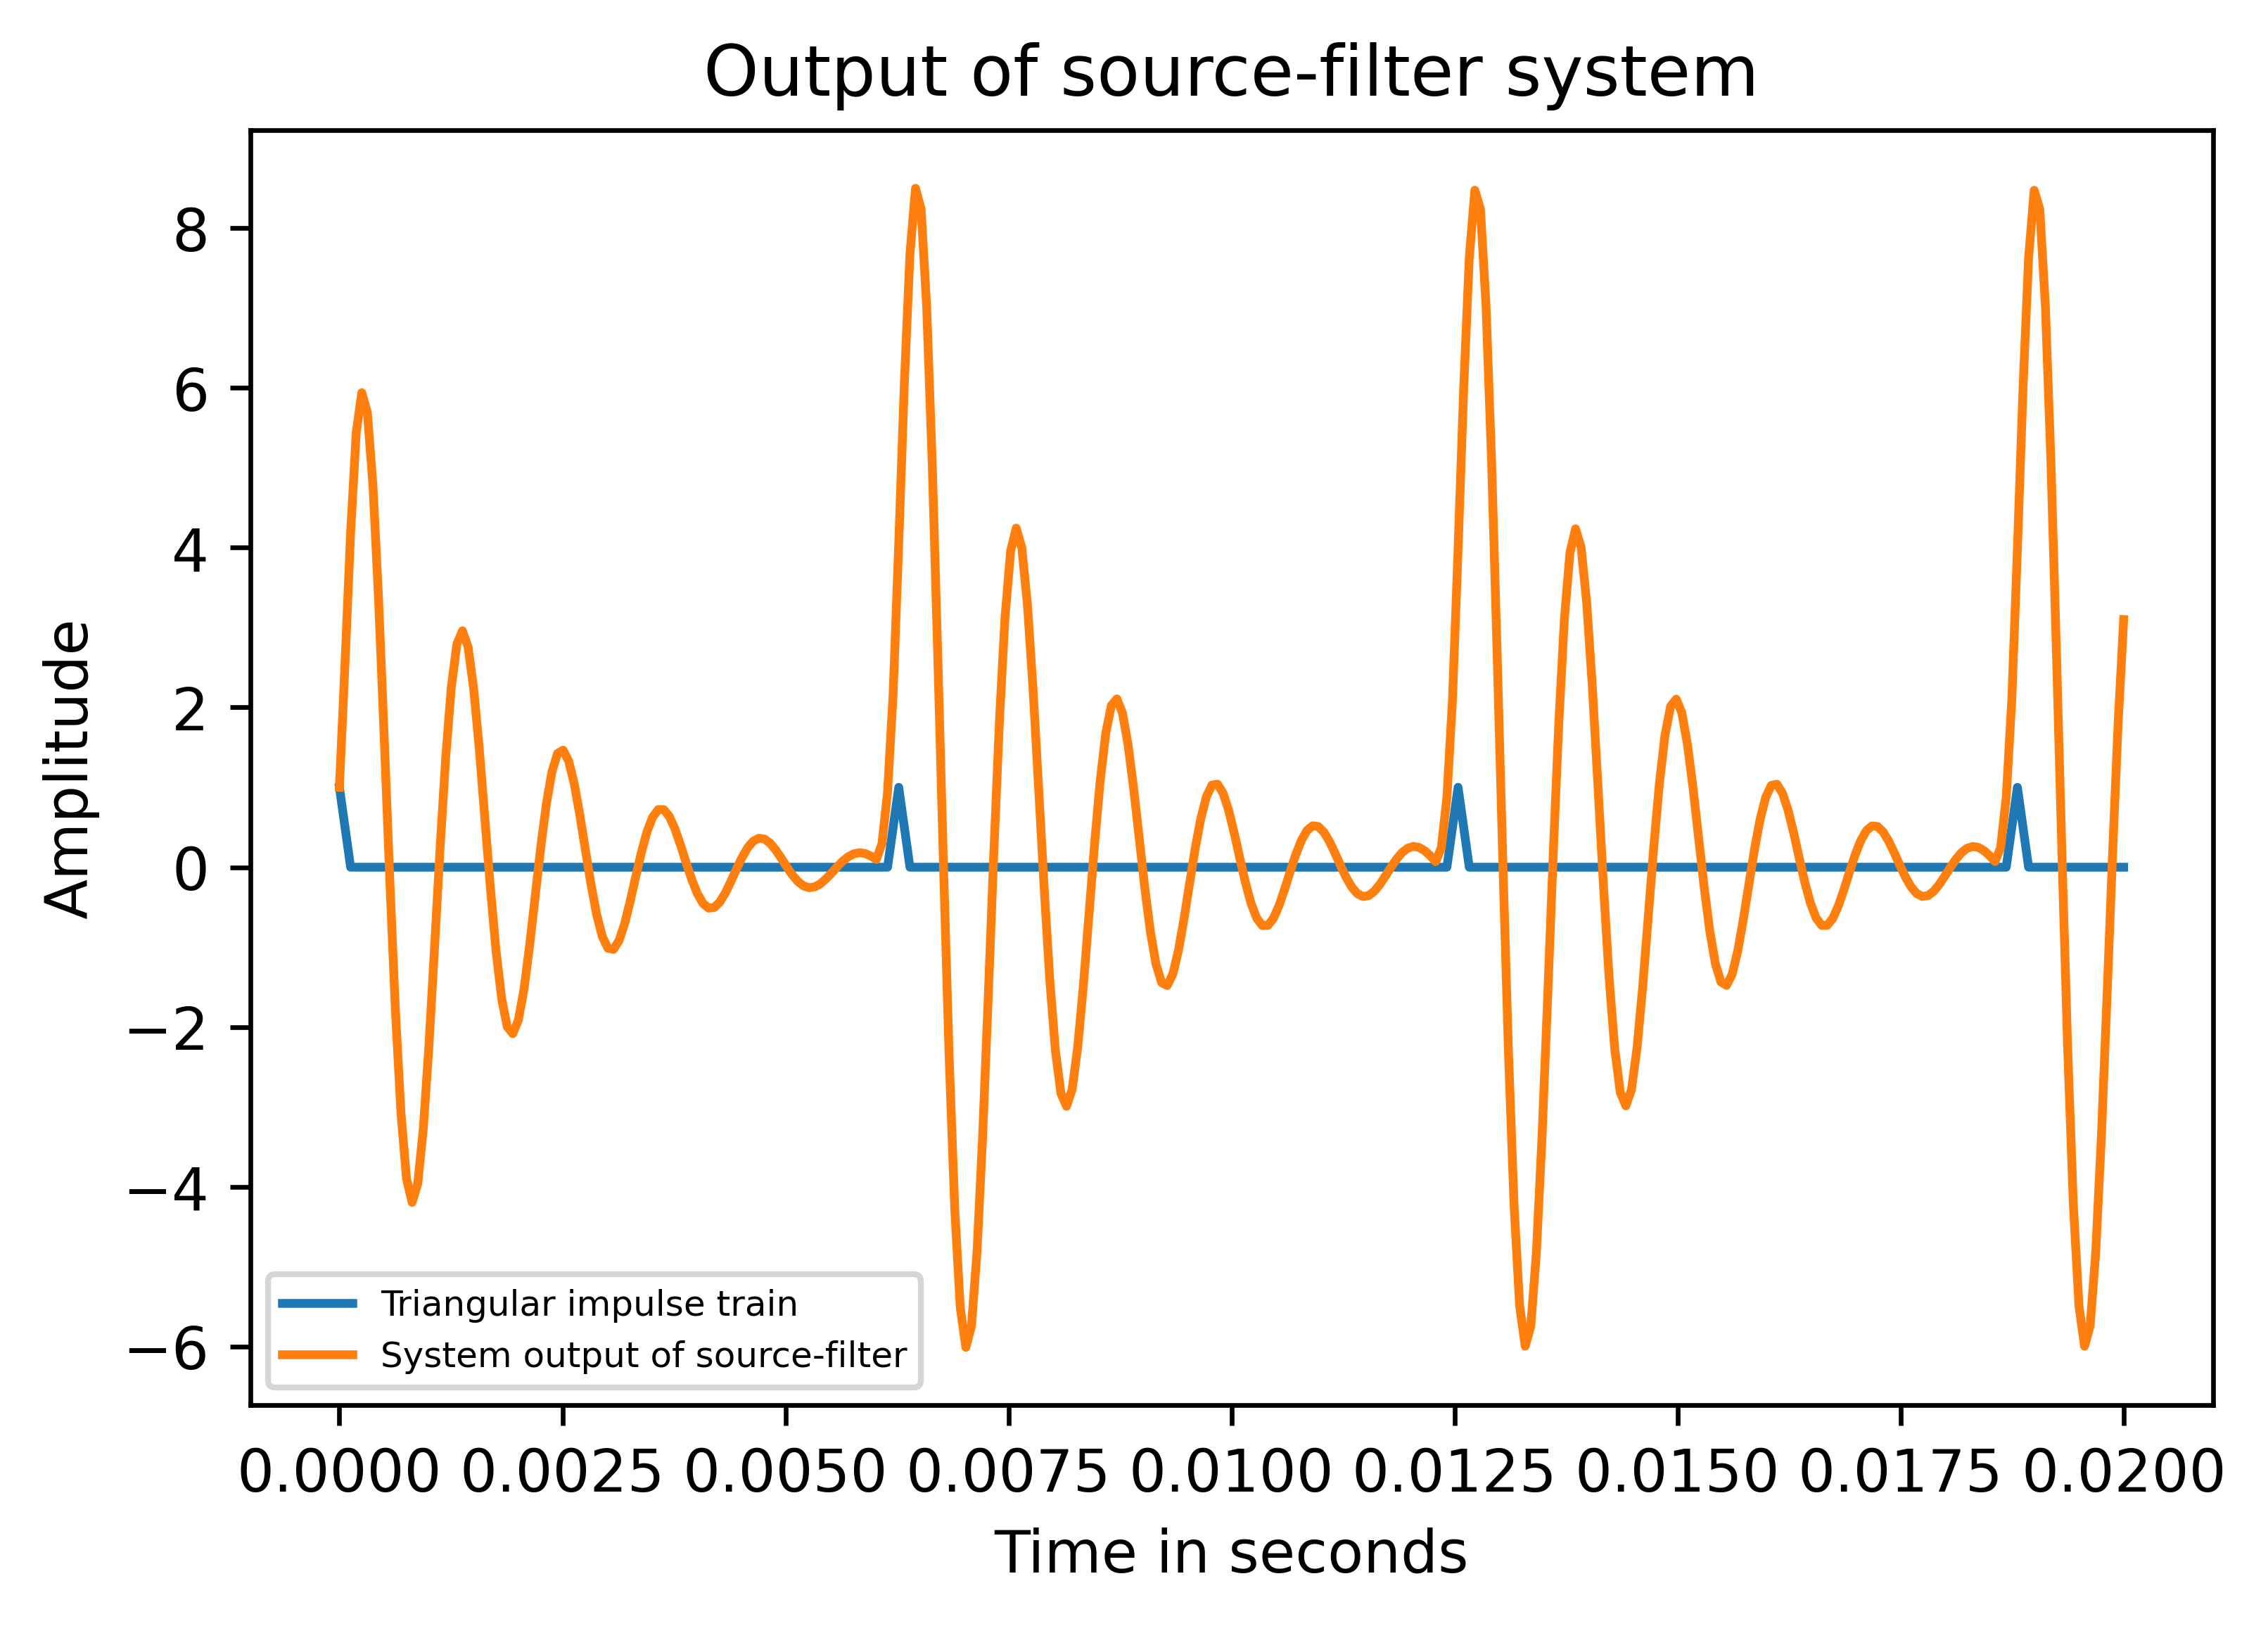

In [224]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [109]:
F0 = 160
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn2.wav', fs, scaled)

# Question 3

### Part 1

In [201]:
f1 = 300 #formant frequency
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [202]:
F0 = 120
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [203]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

Text(0.5, 1.0, 'System output of source-filter')

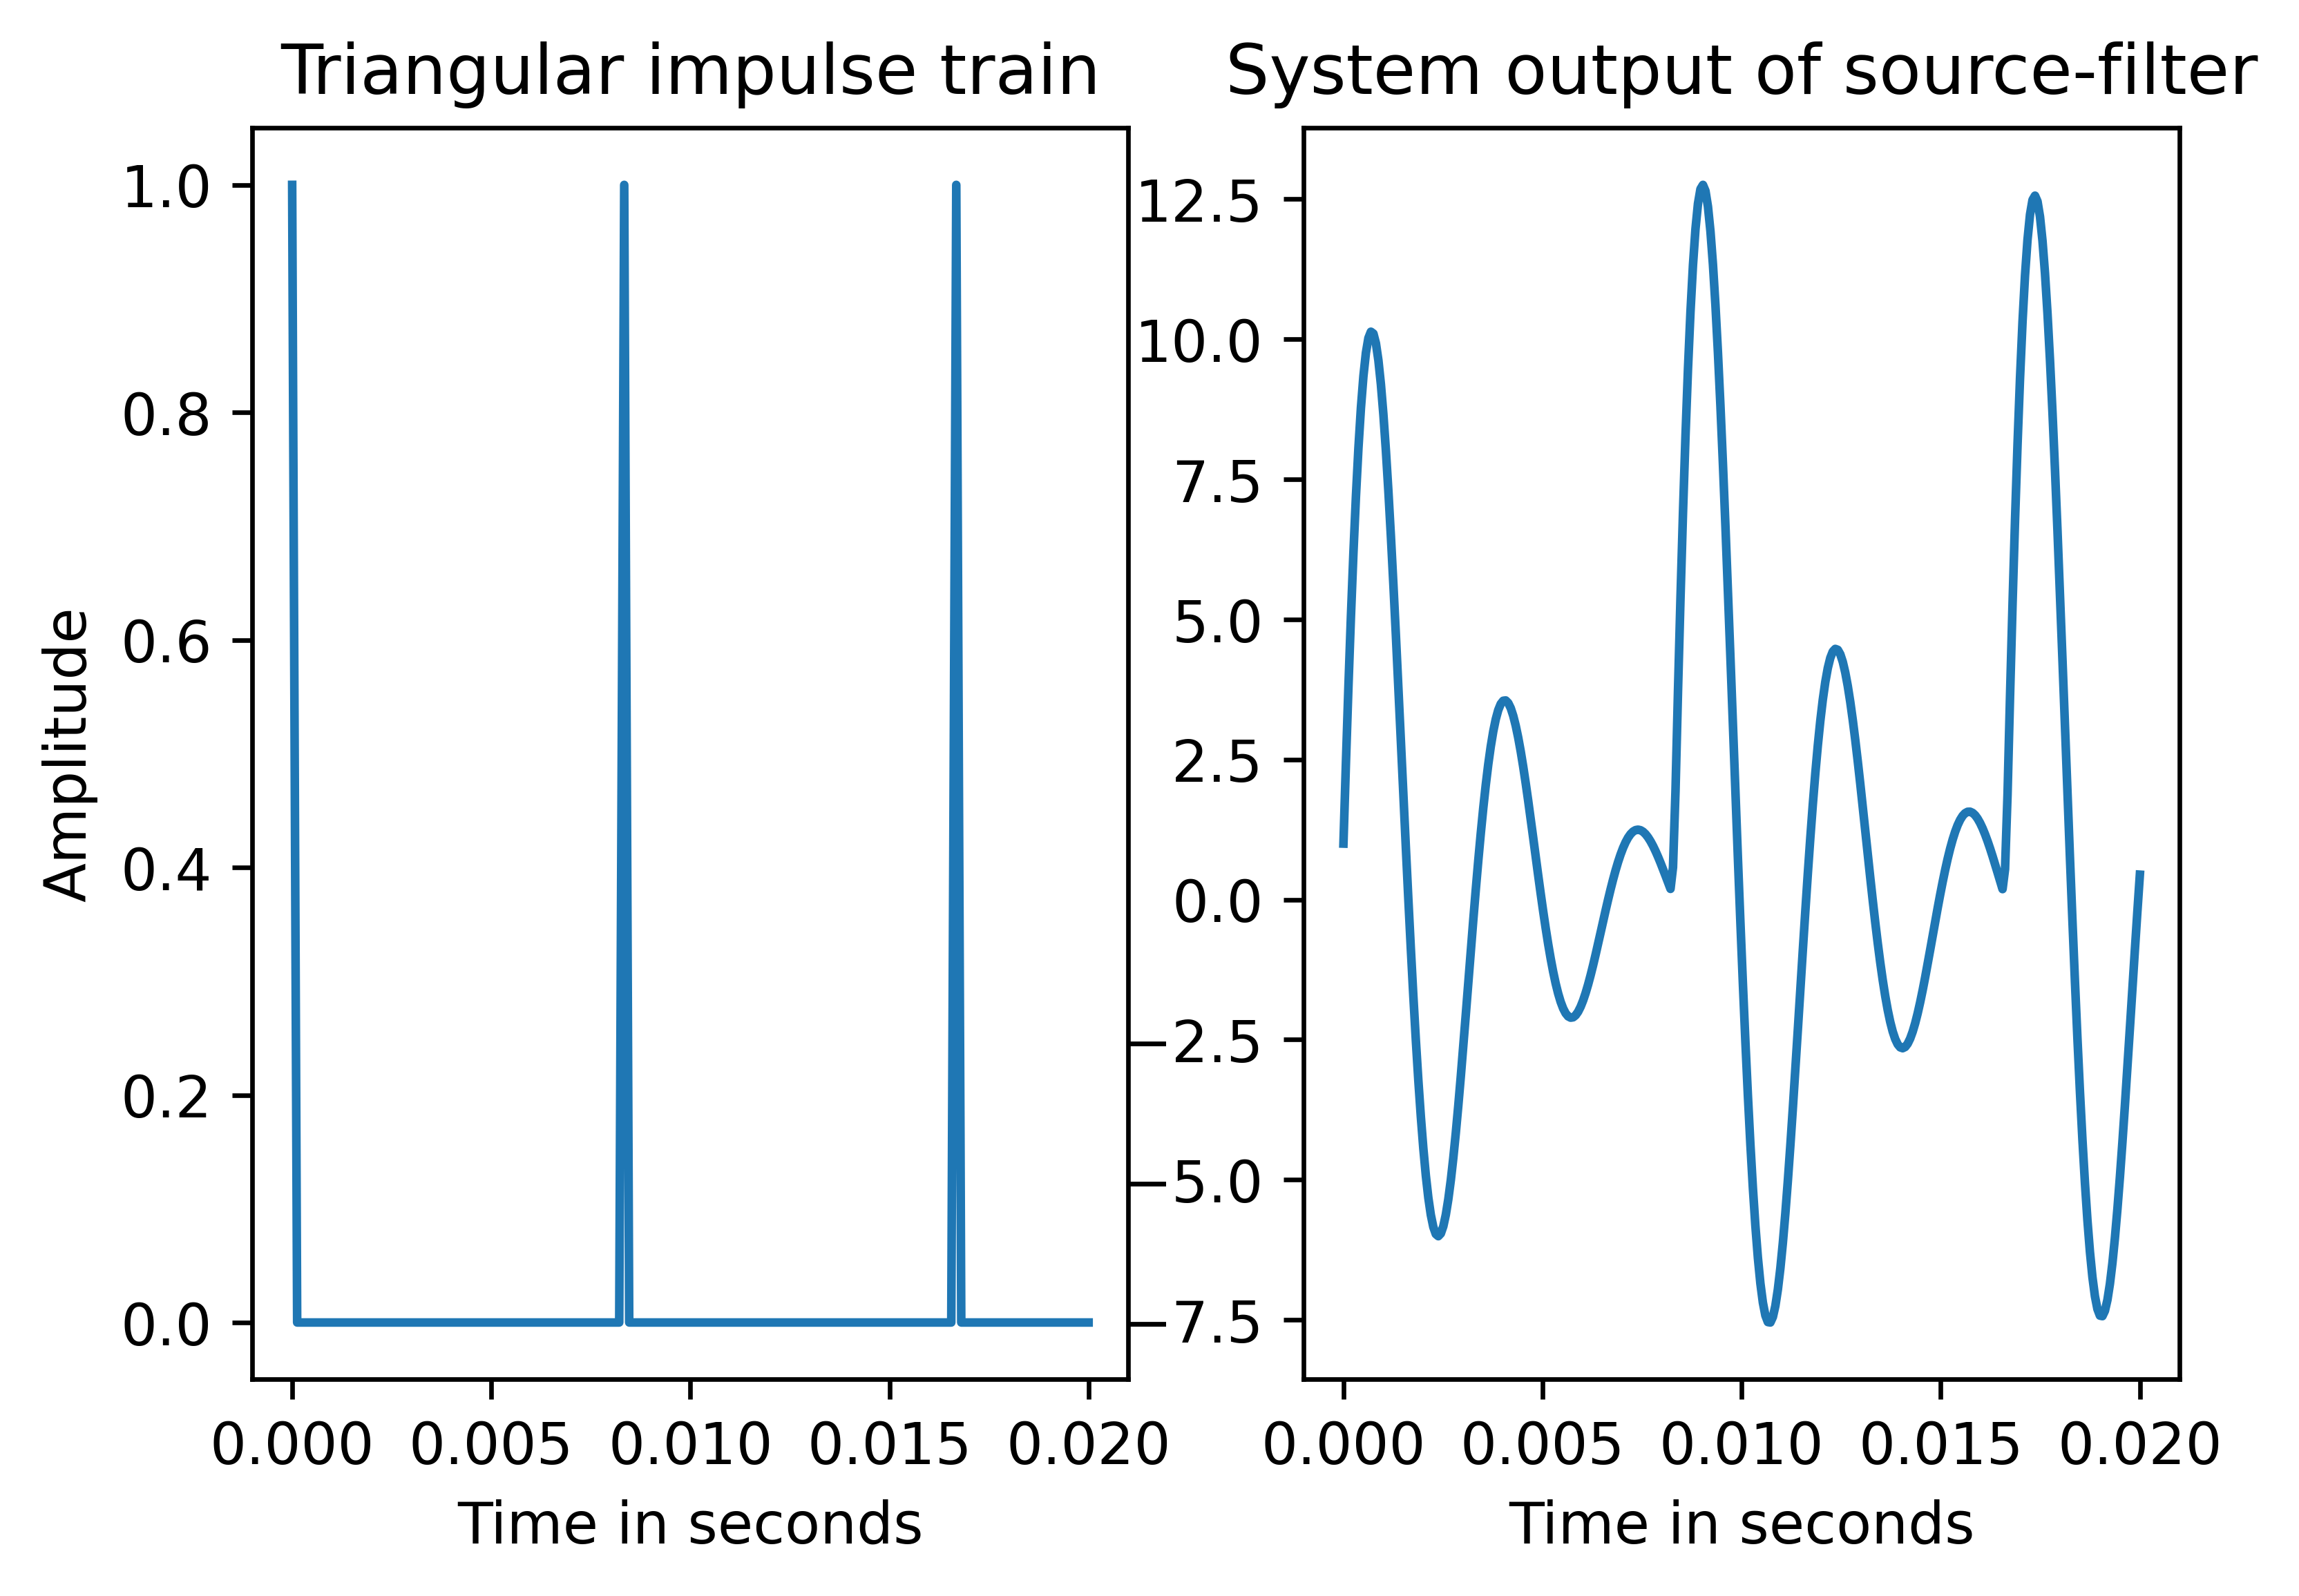

In [204]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

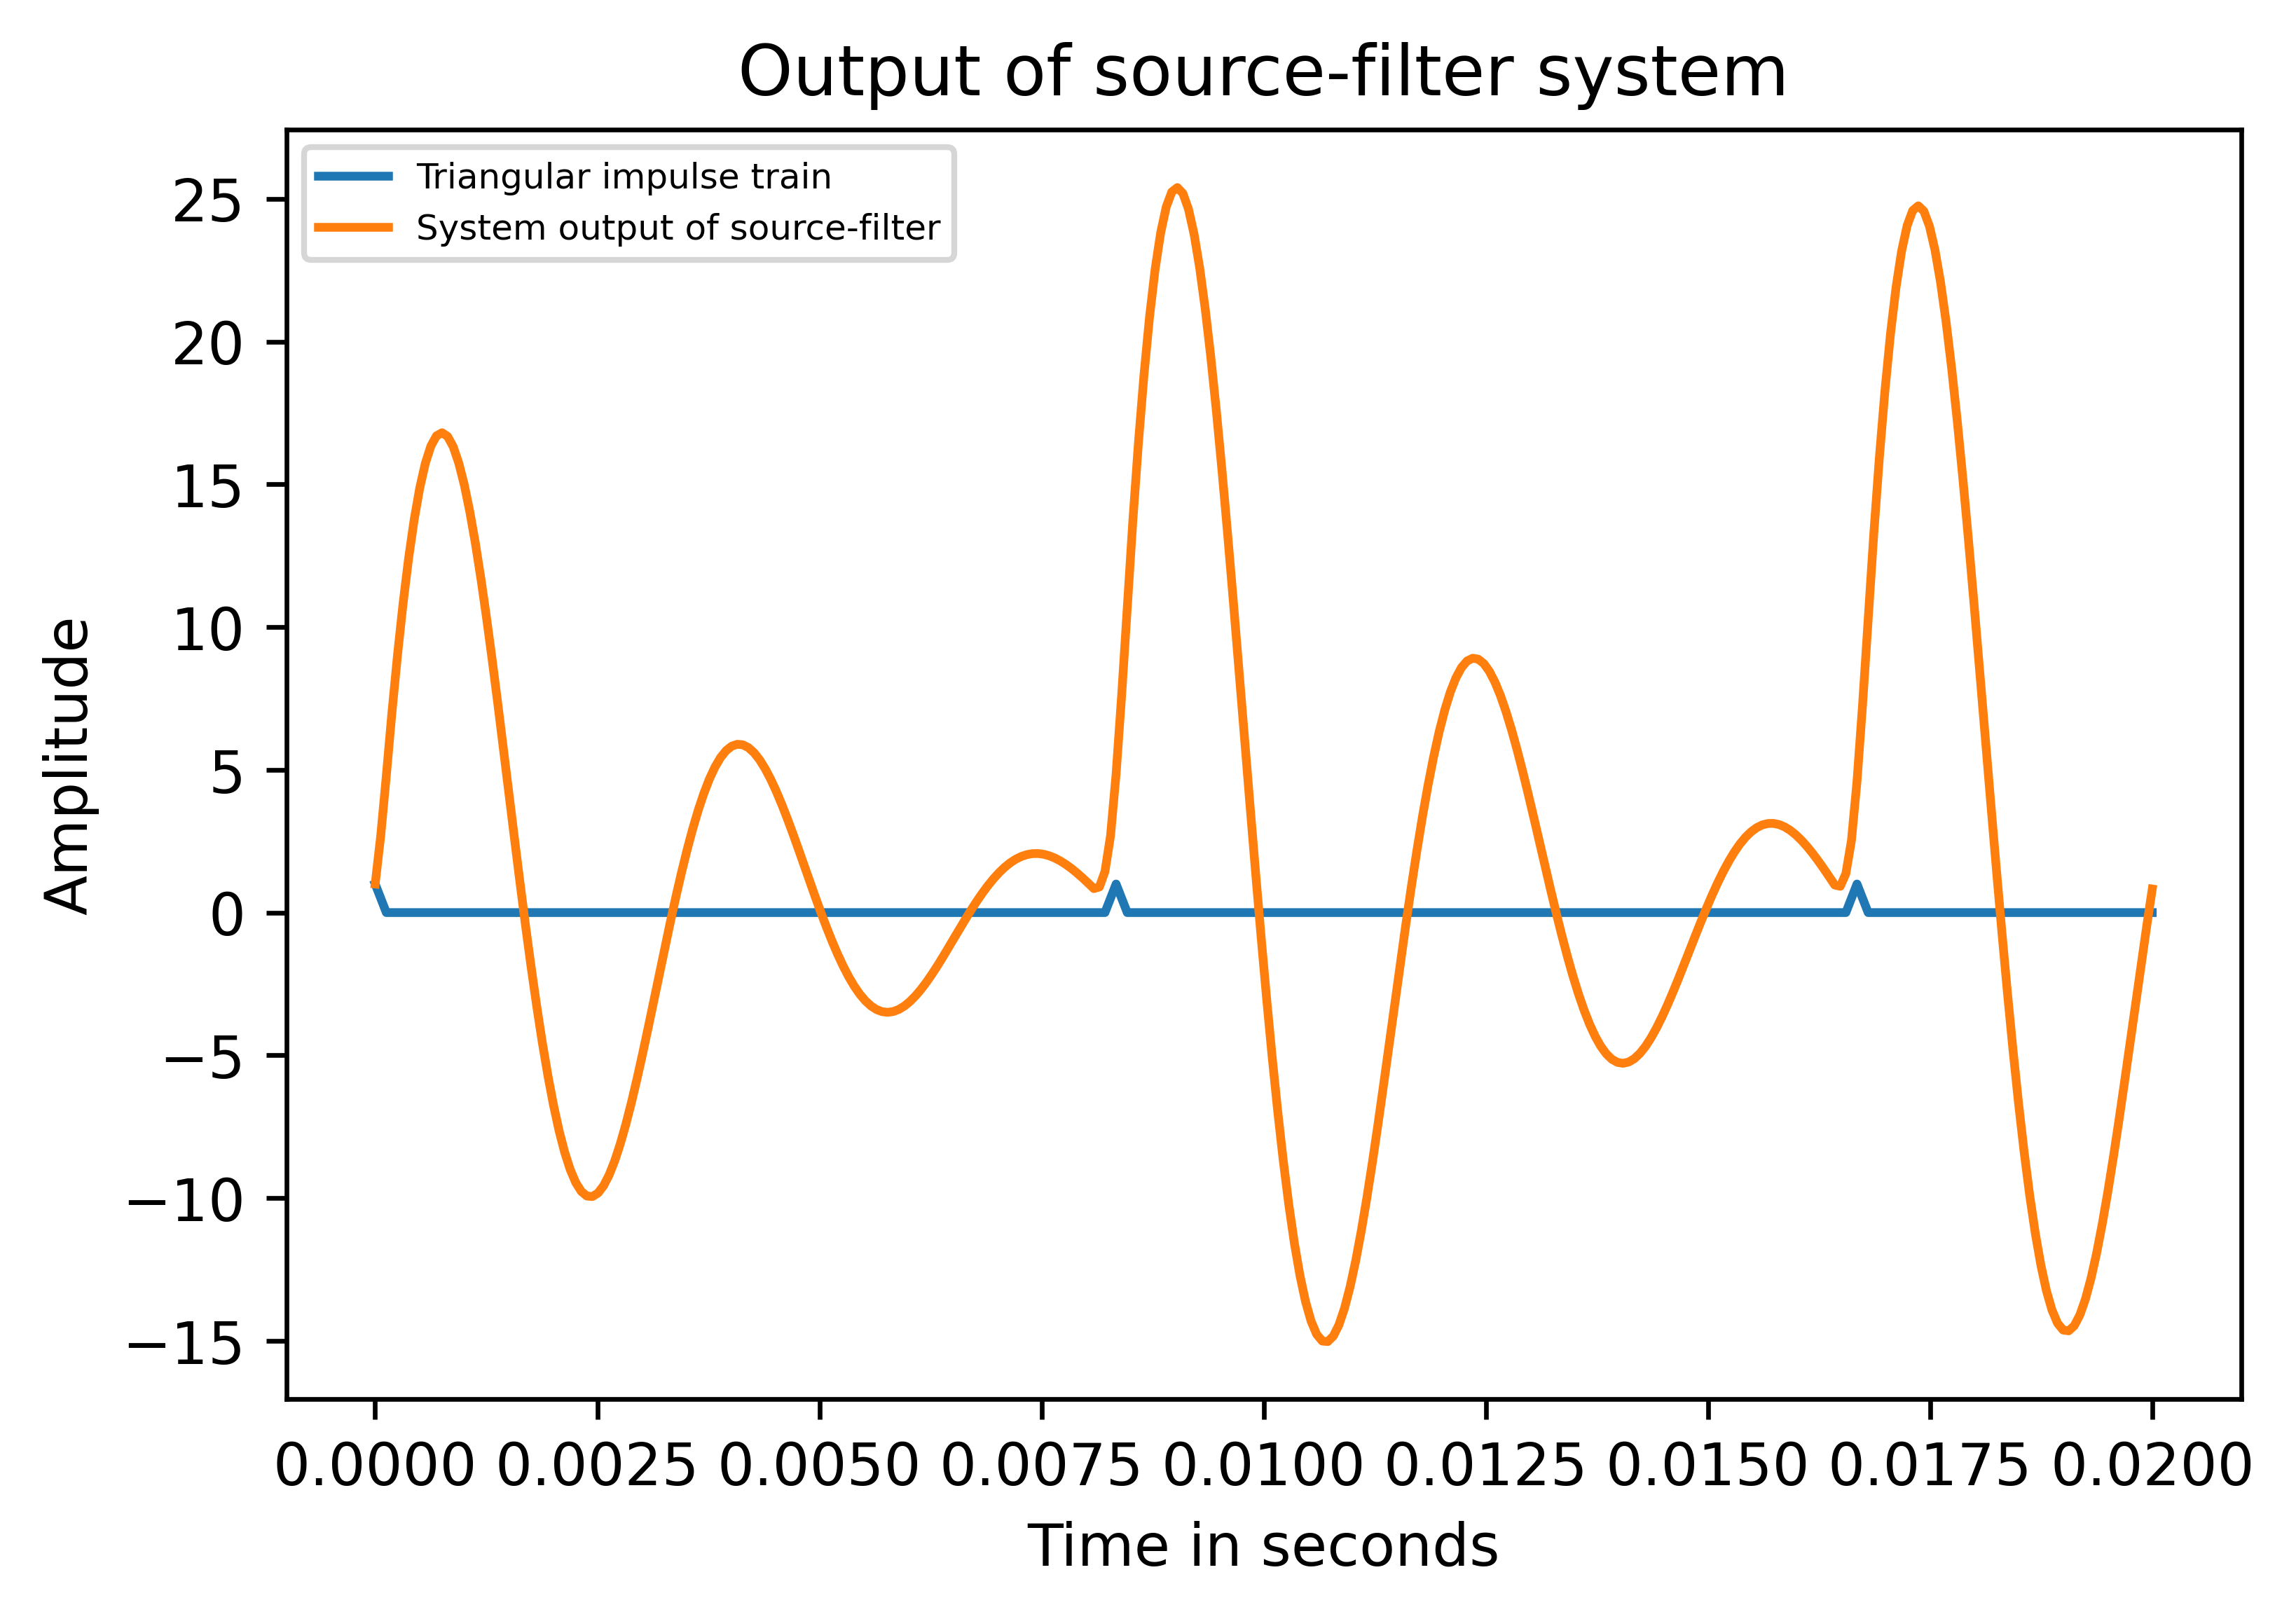

In [207]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [116]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn3a.wav', fs, scaled)

### Part 2

In [208]:
f1 = 1100 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [209]:
F0 = 120
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [210]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

Text(0.5, 1.0, 'System output of source-filter')

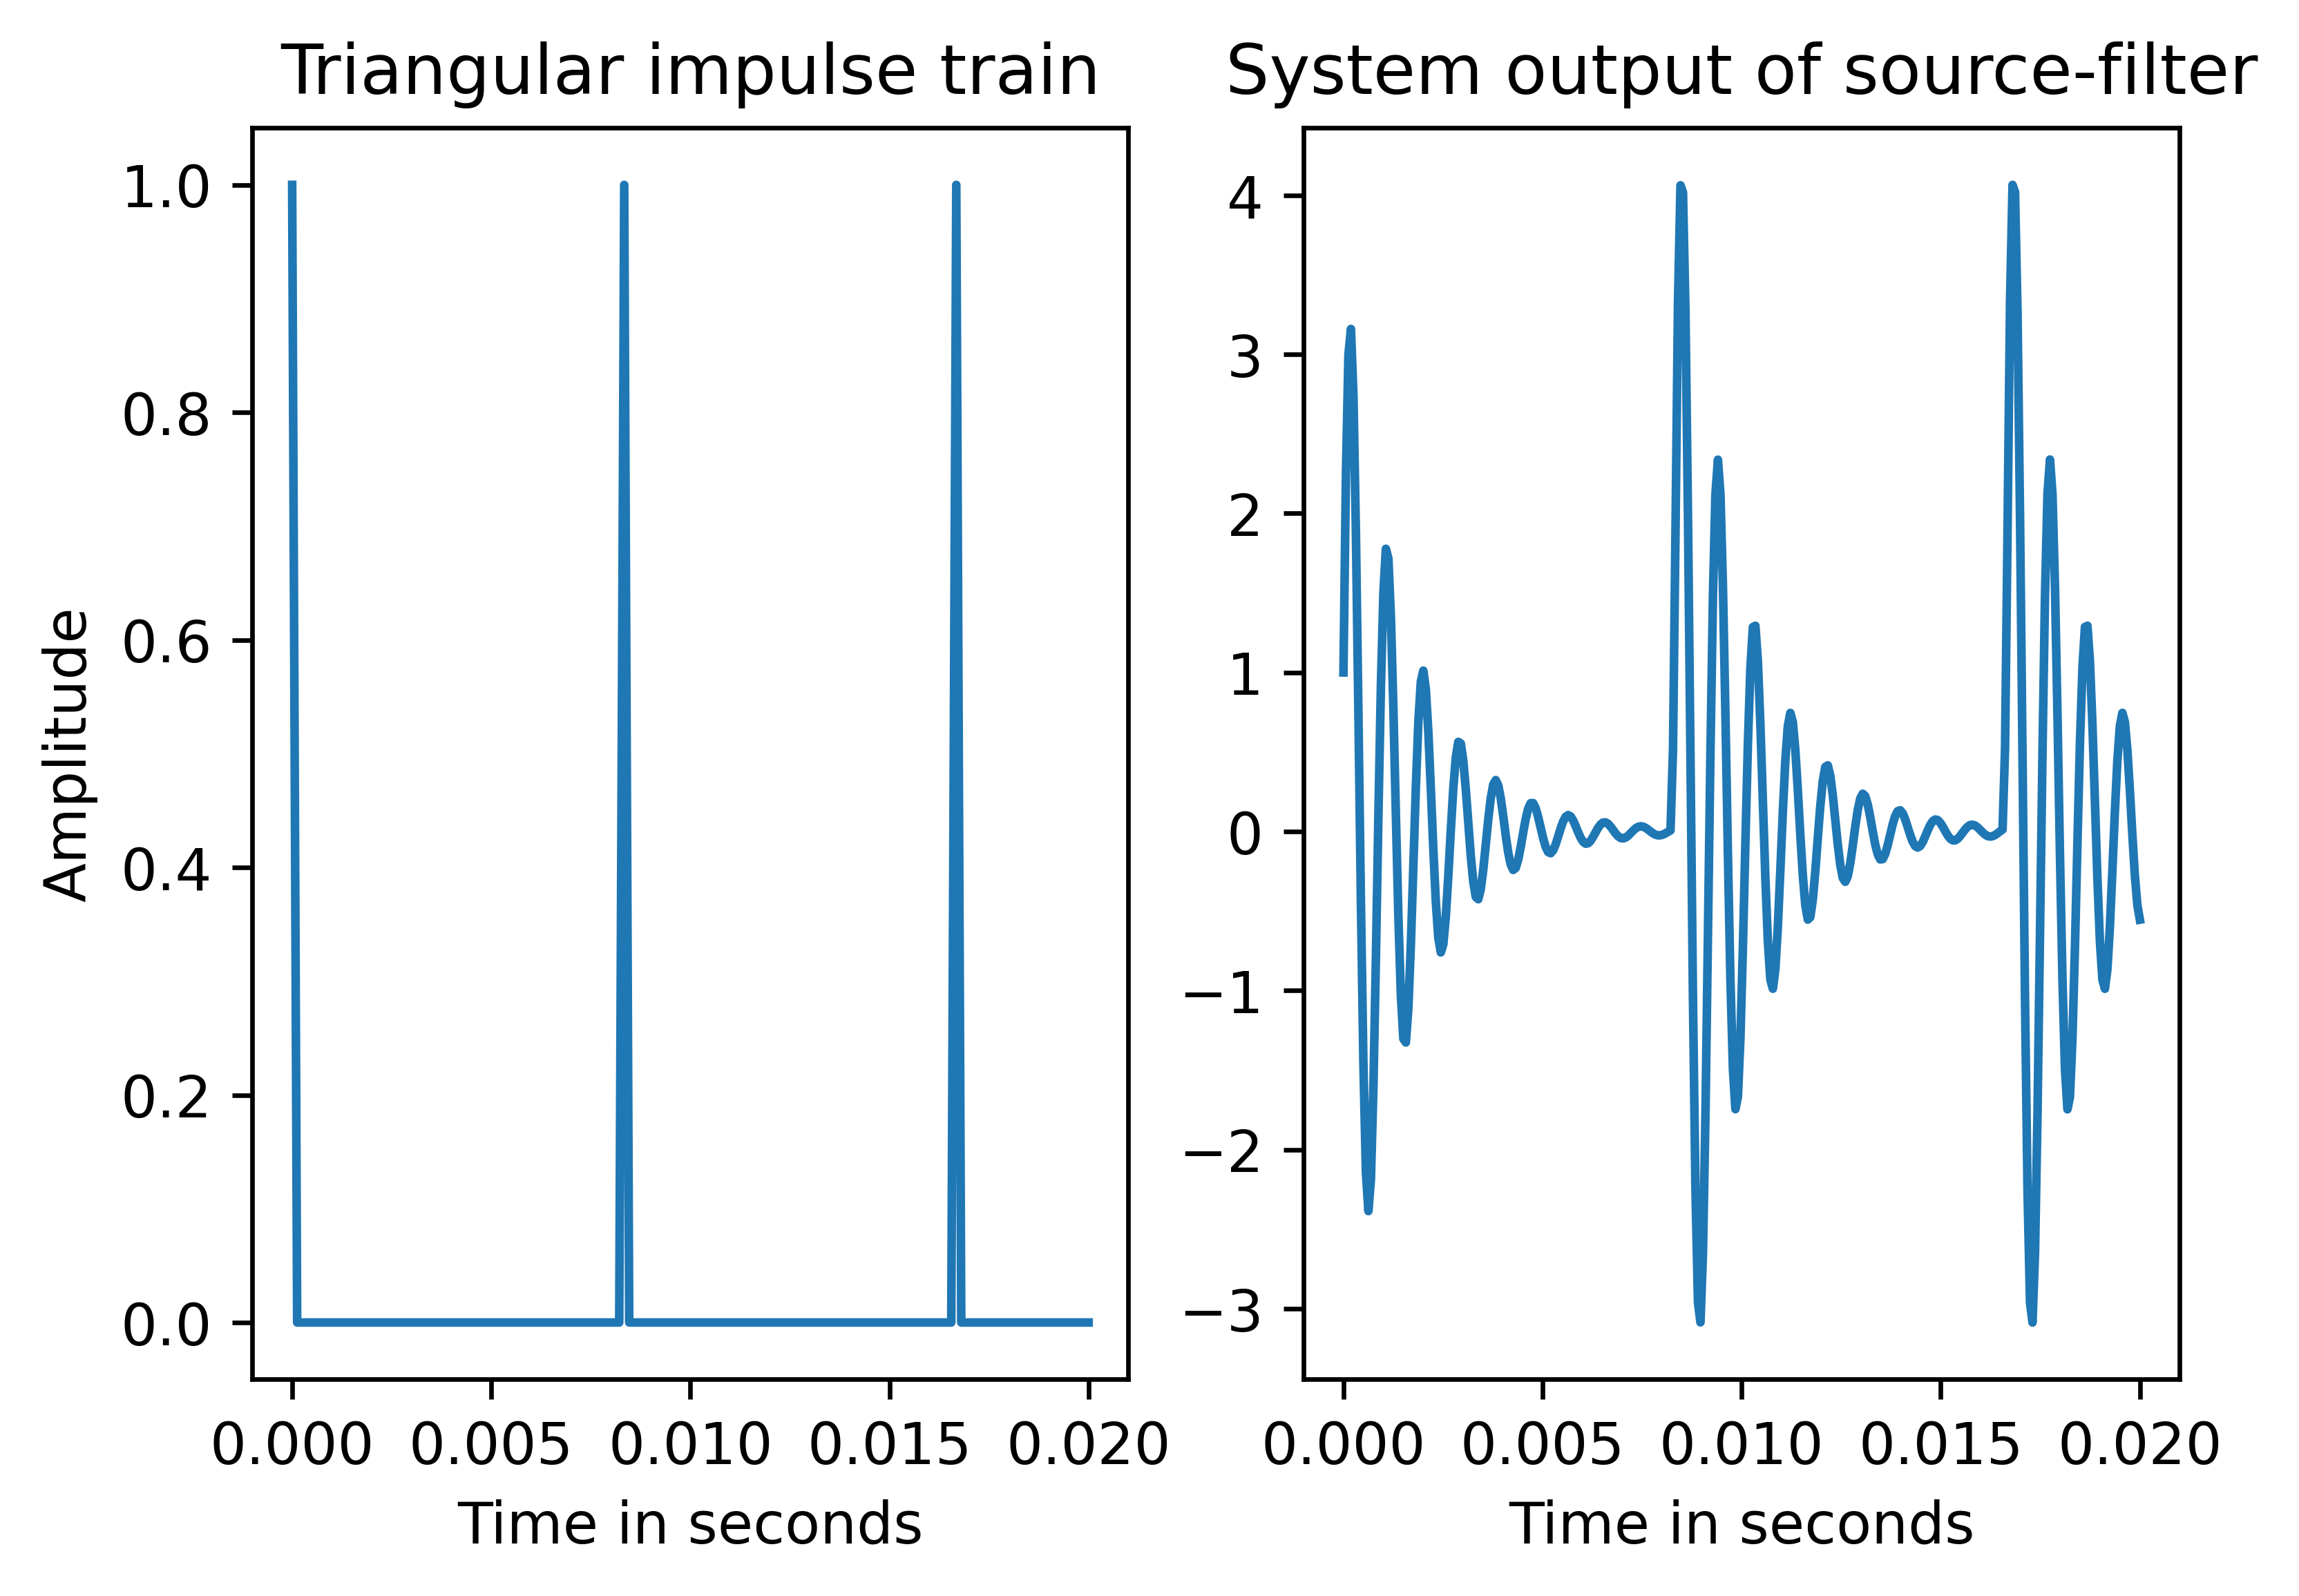

In [211]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

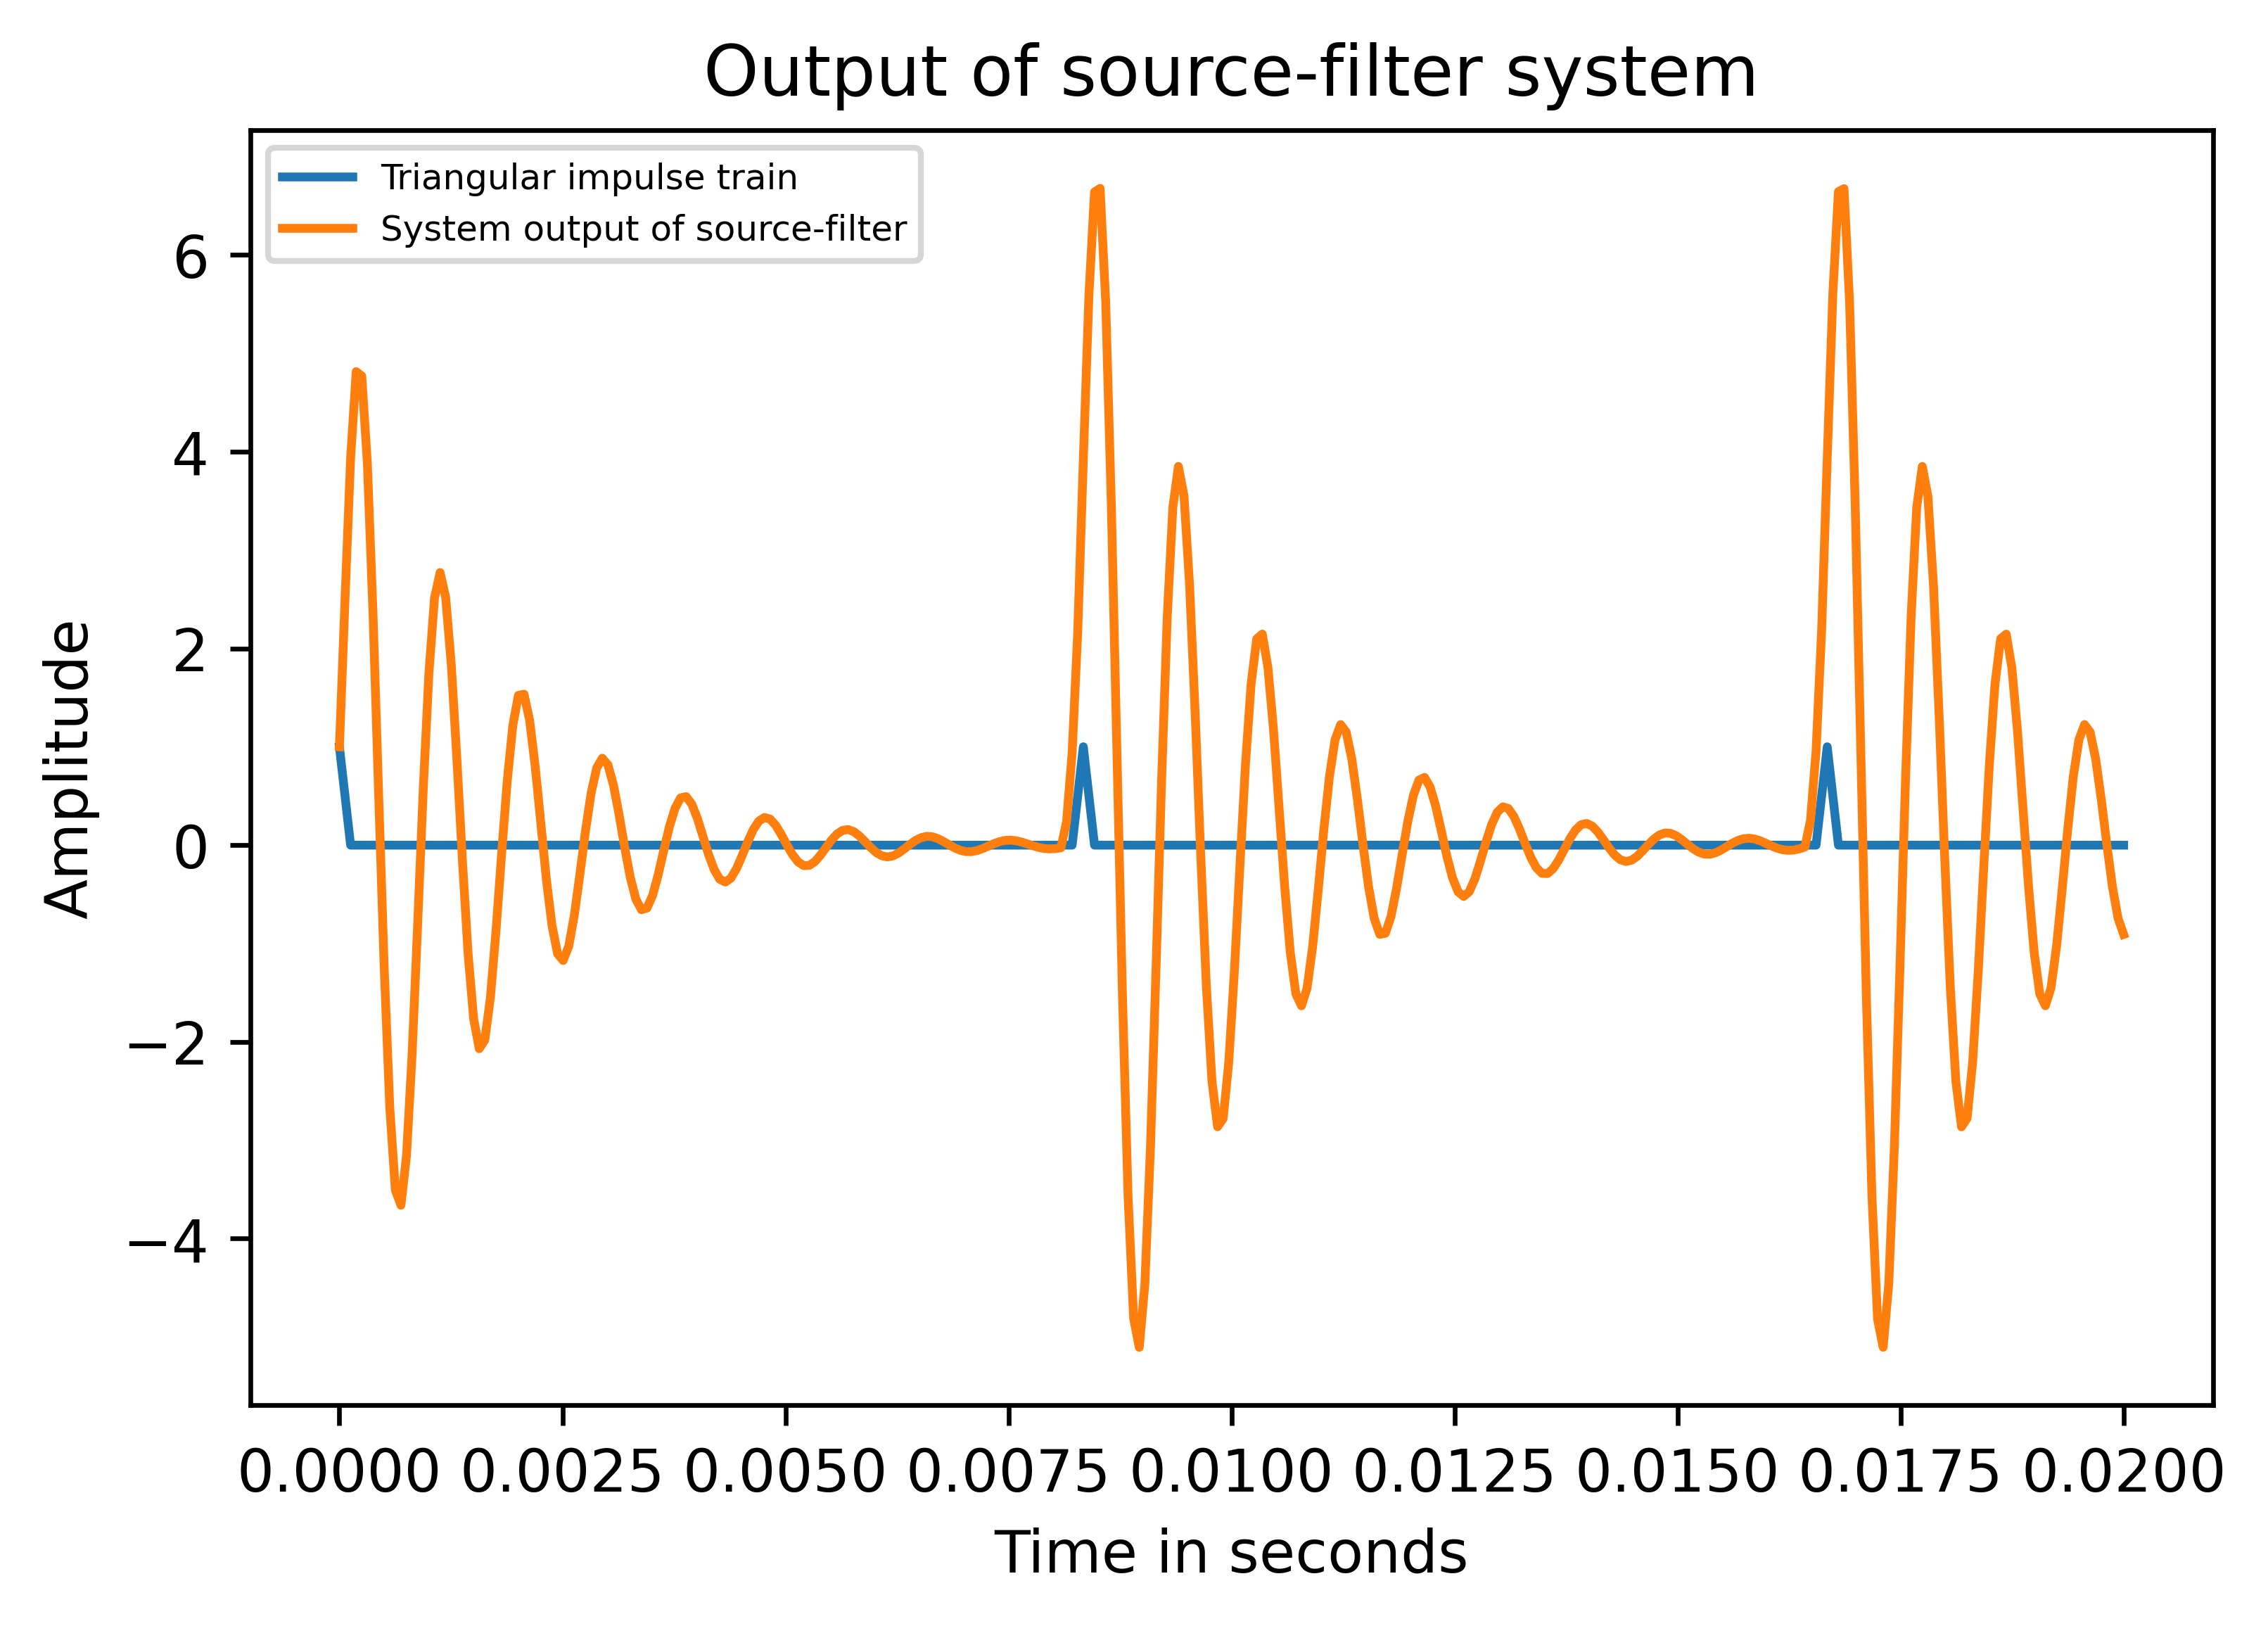

In [212]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [123]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn3b.wav', fs, scaled)

### Part 3

In [213]:
f1 = 300 #formant frequency
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [214]:
F0 = 180
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [215]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

Text(0.5, 1.0, 'System output of source-filter')

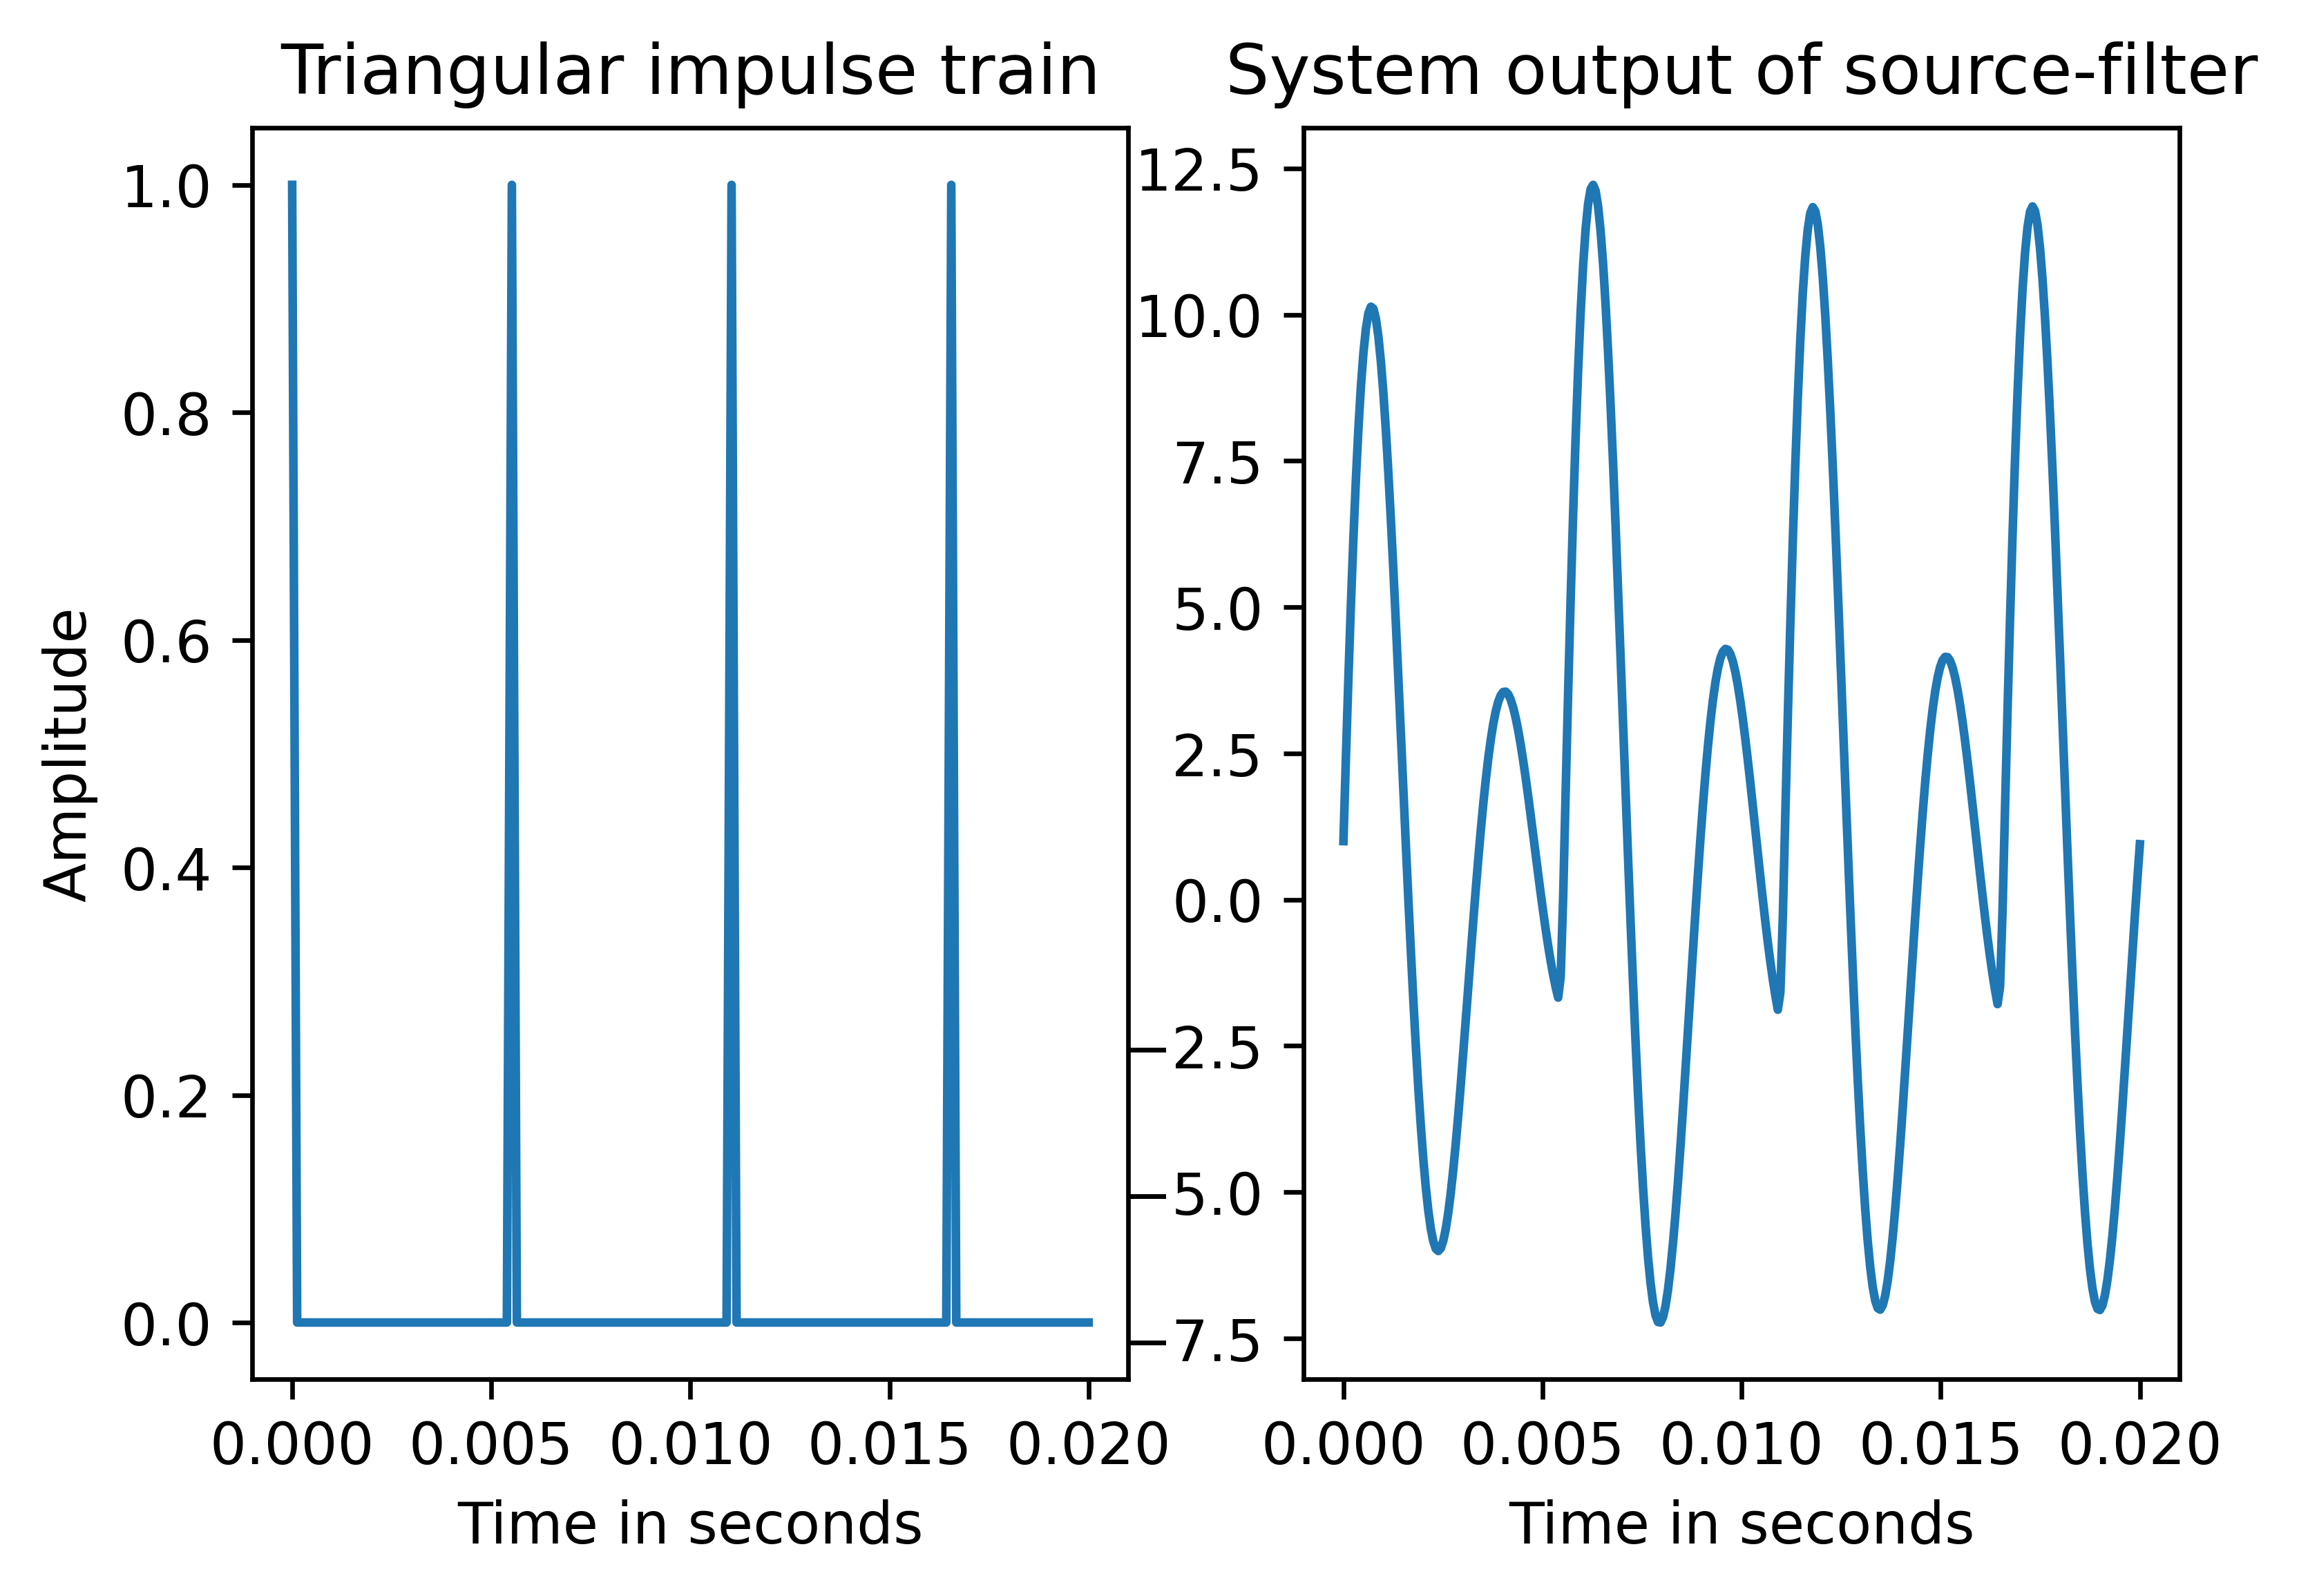

In [216]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

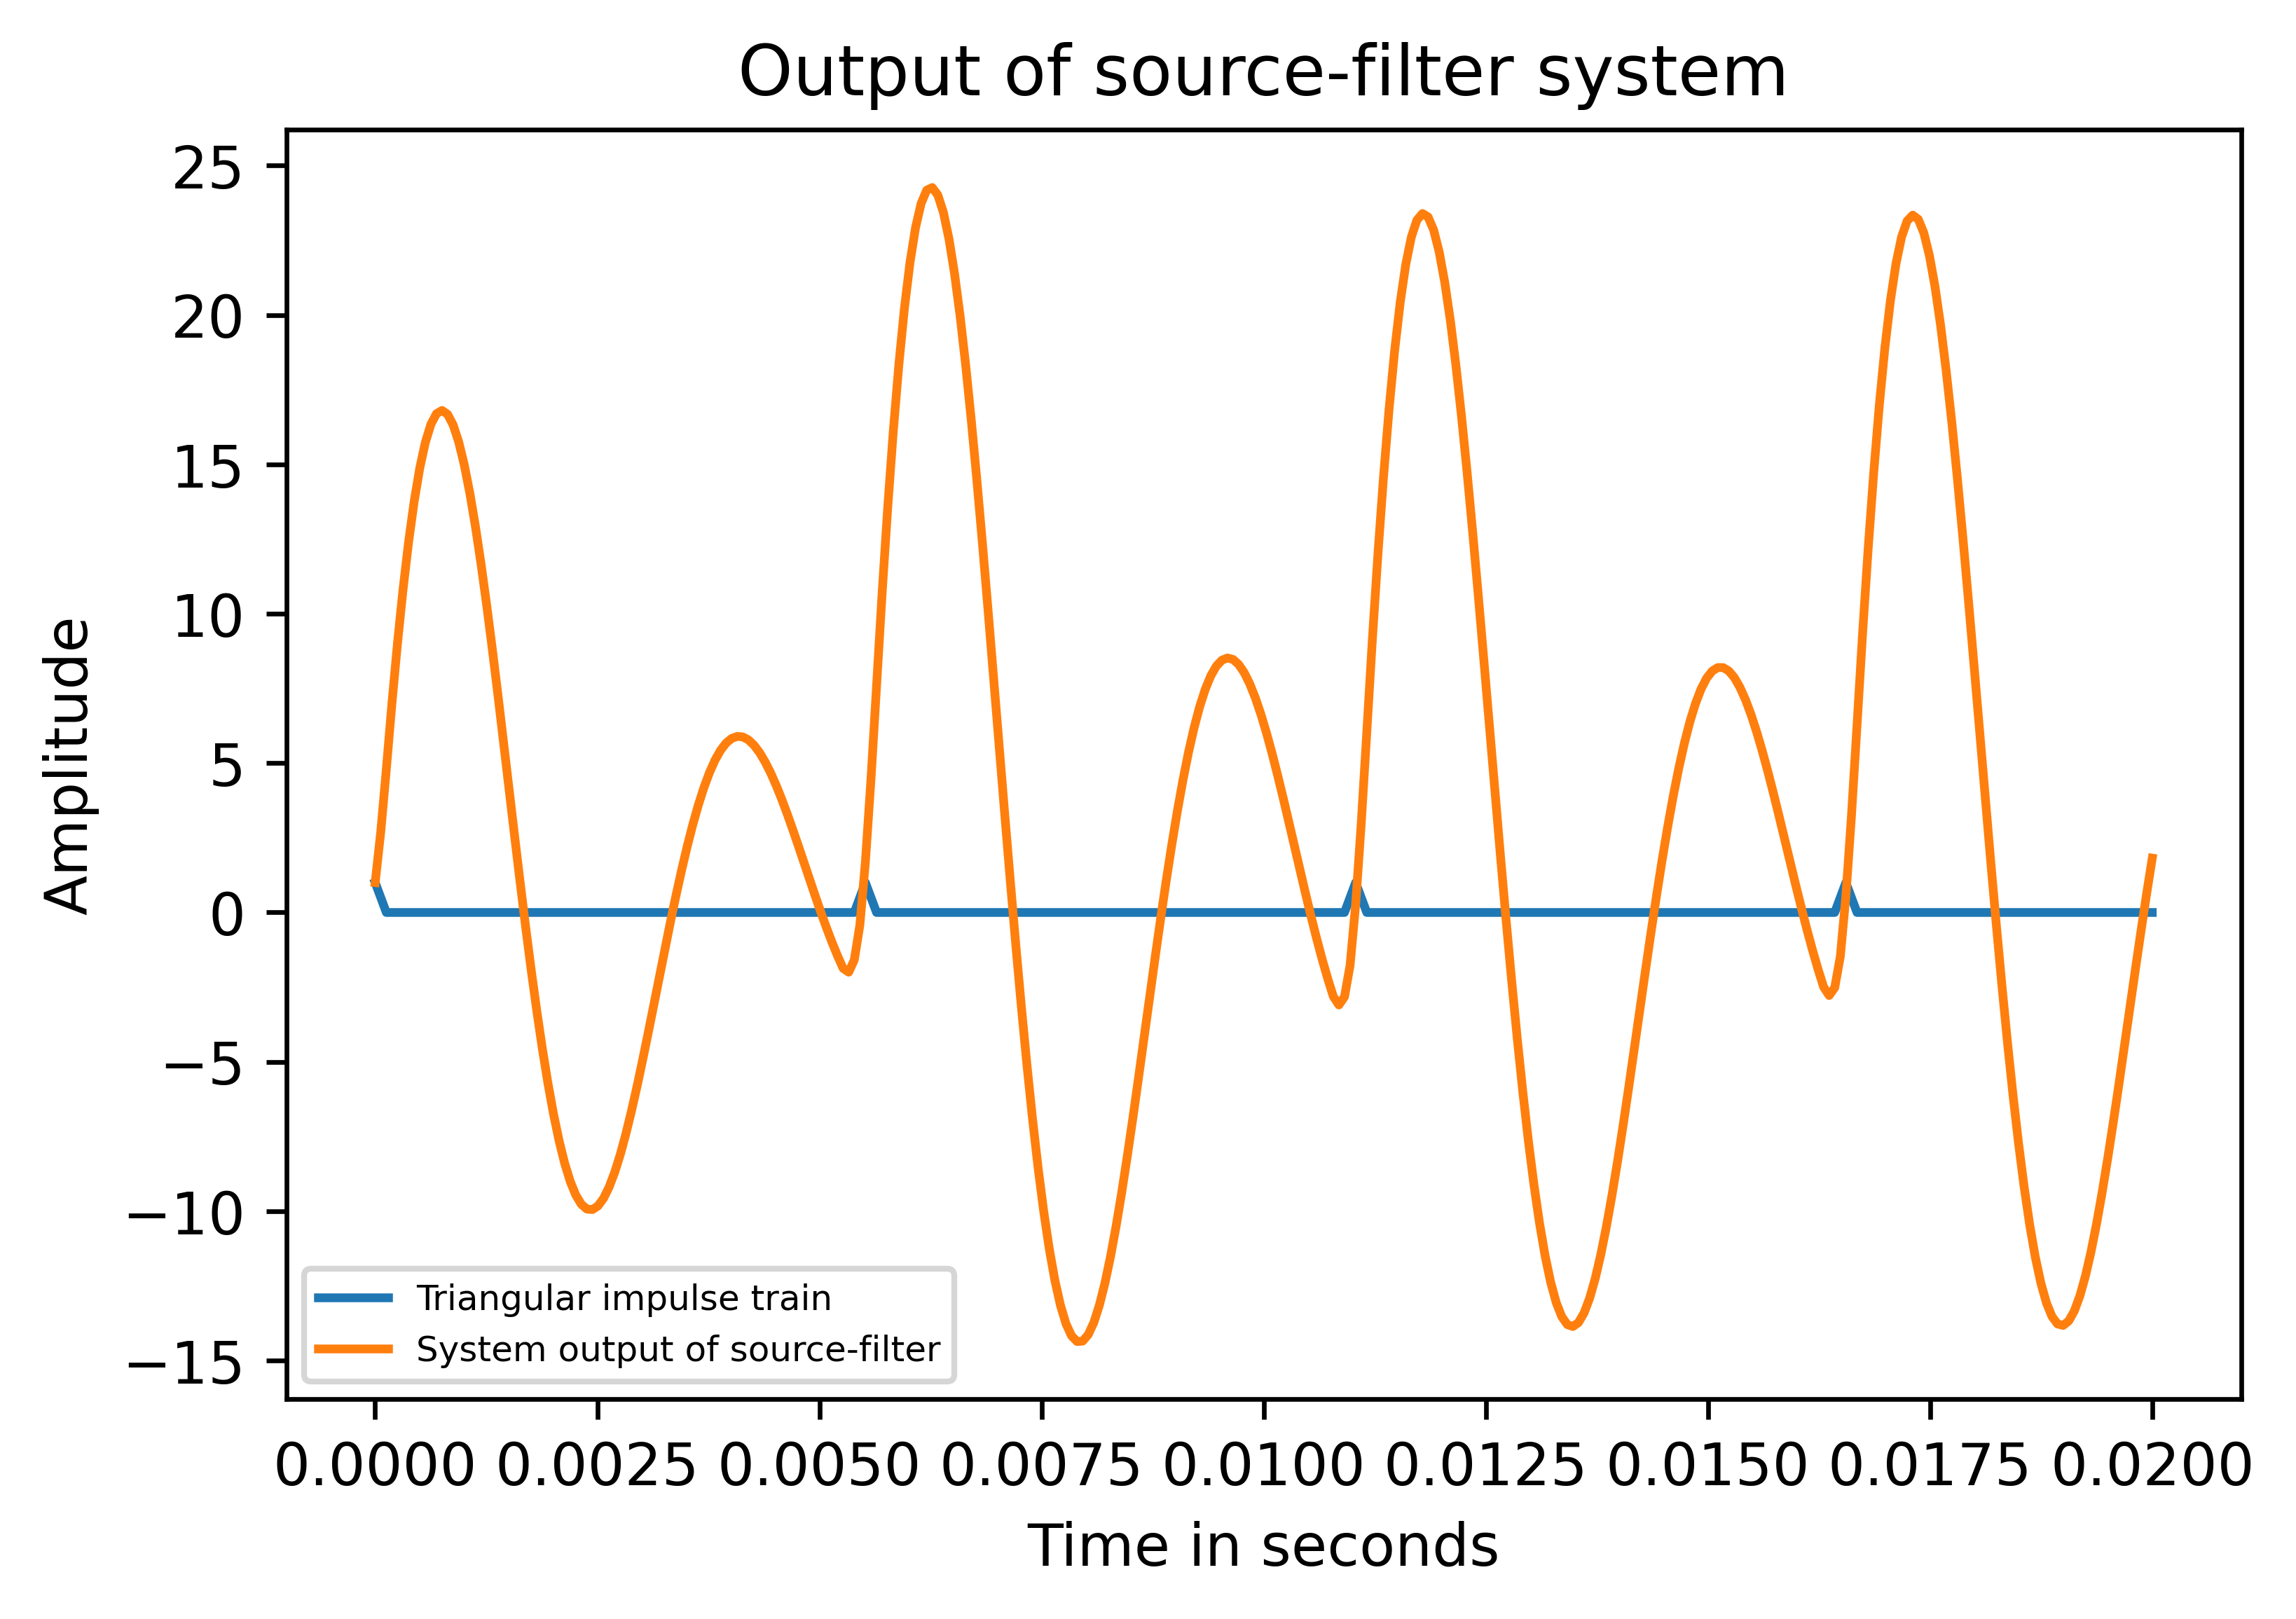

In [217]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [130]:
F0 = 180
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn3c.wav', fs, scaled)

# Question 4

## /a/ @ 120Hz

In [226]:
f1 = 730 #formant frequency
f2 = 1090
f3 = 2440
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [227]:
F0 = 120
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [228]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [229]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

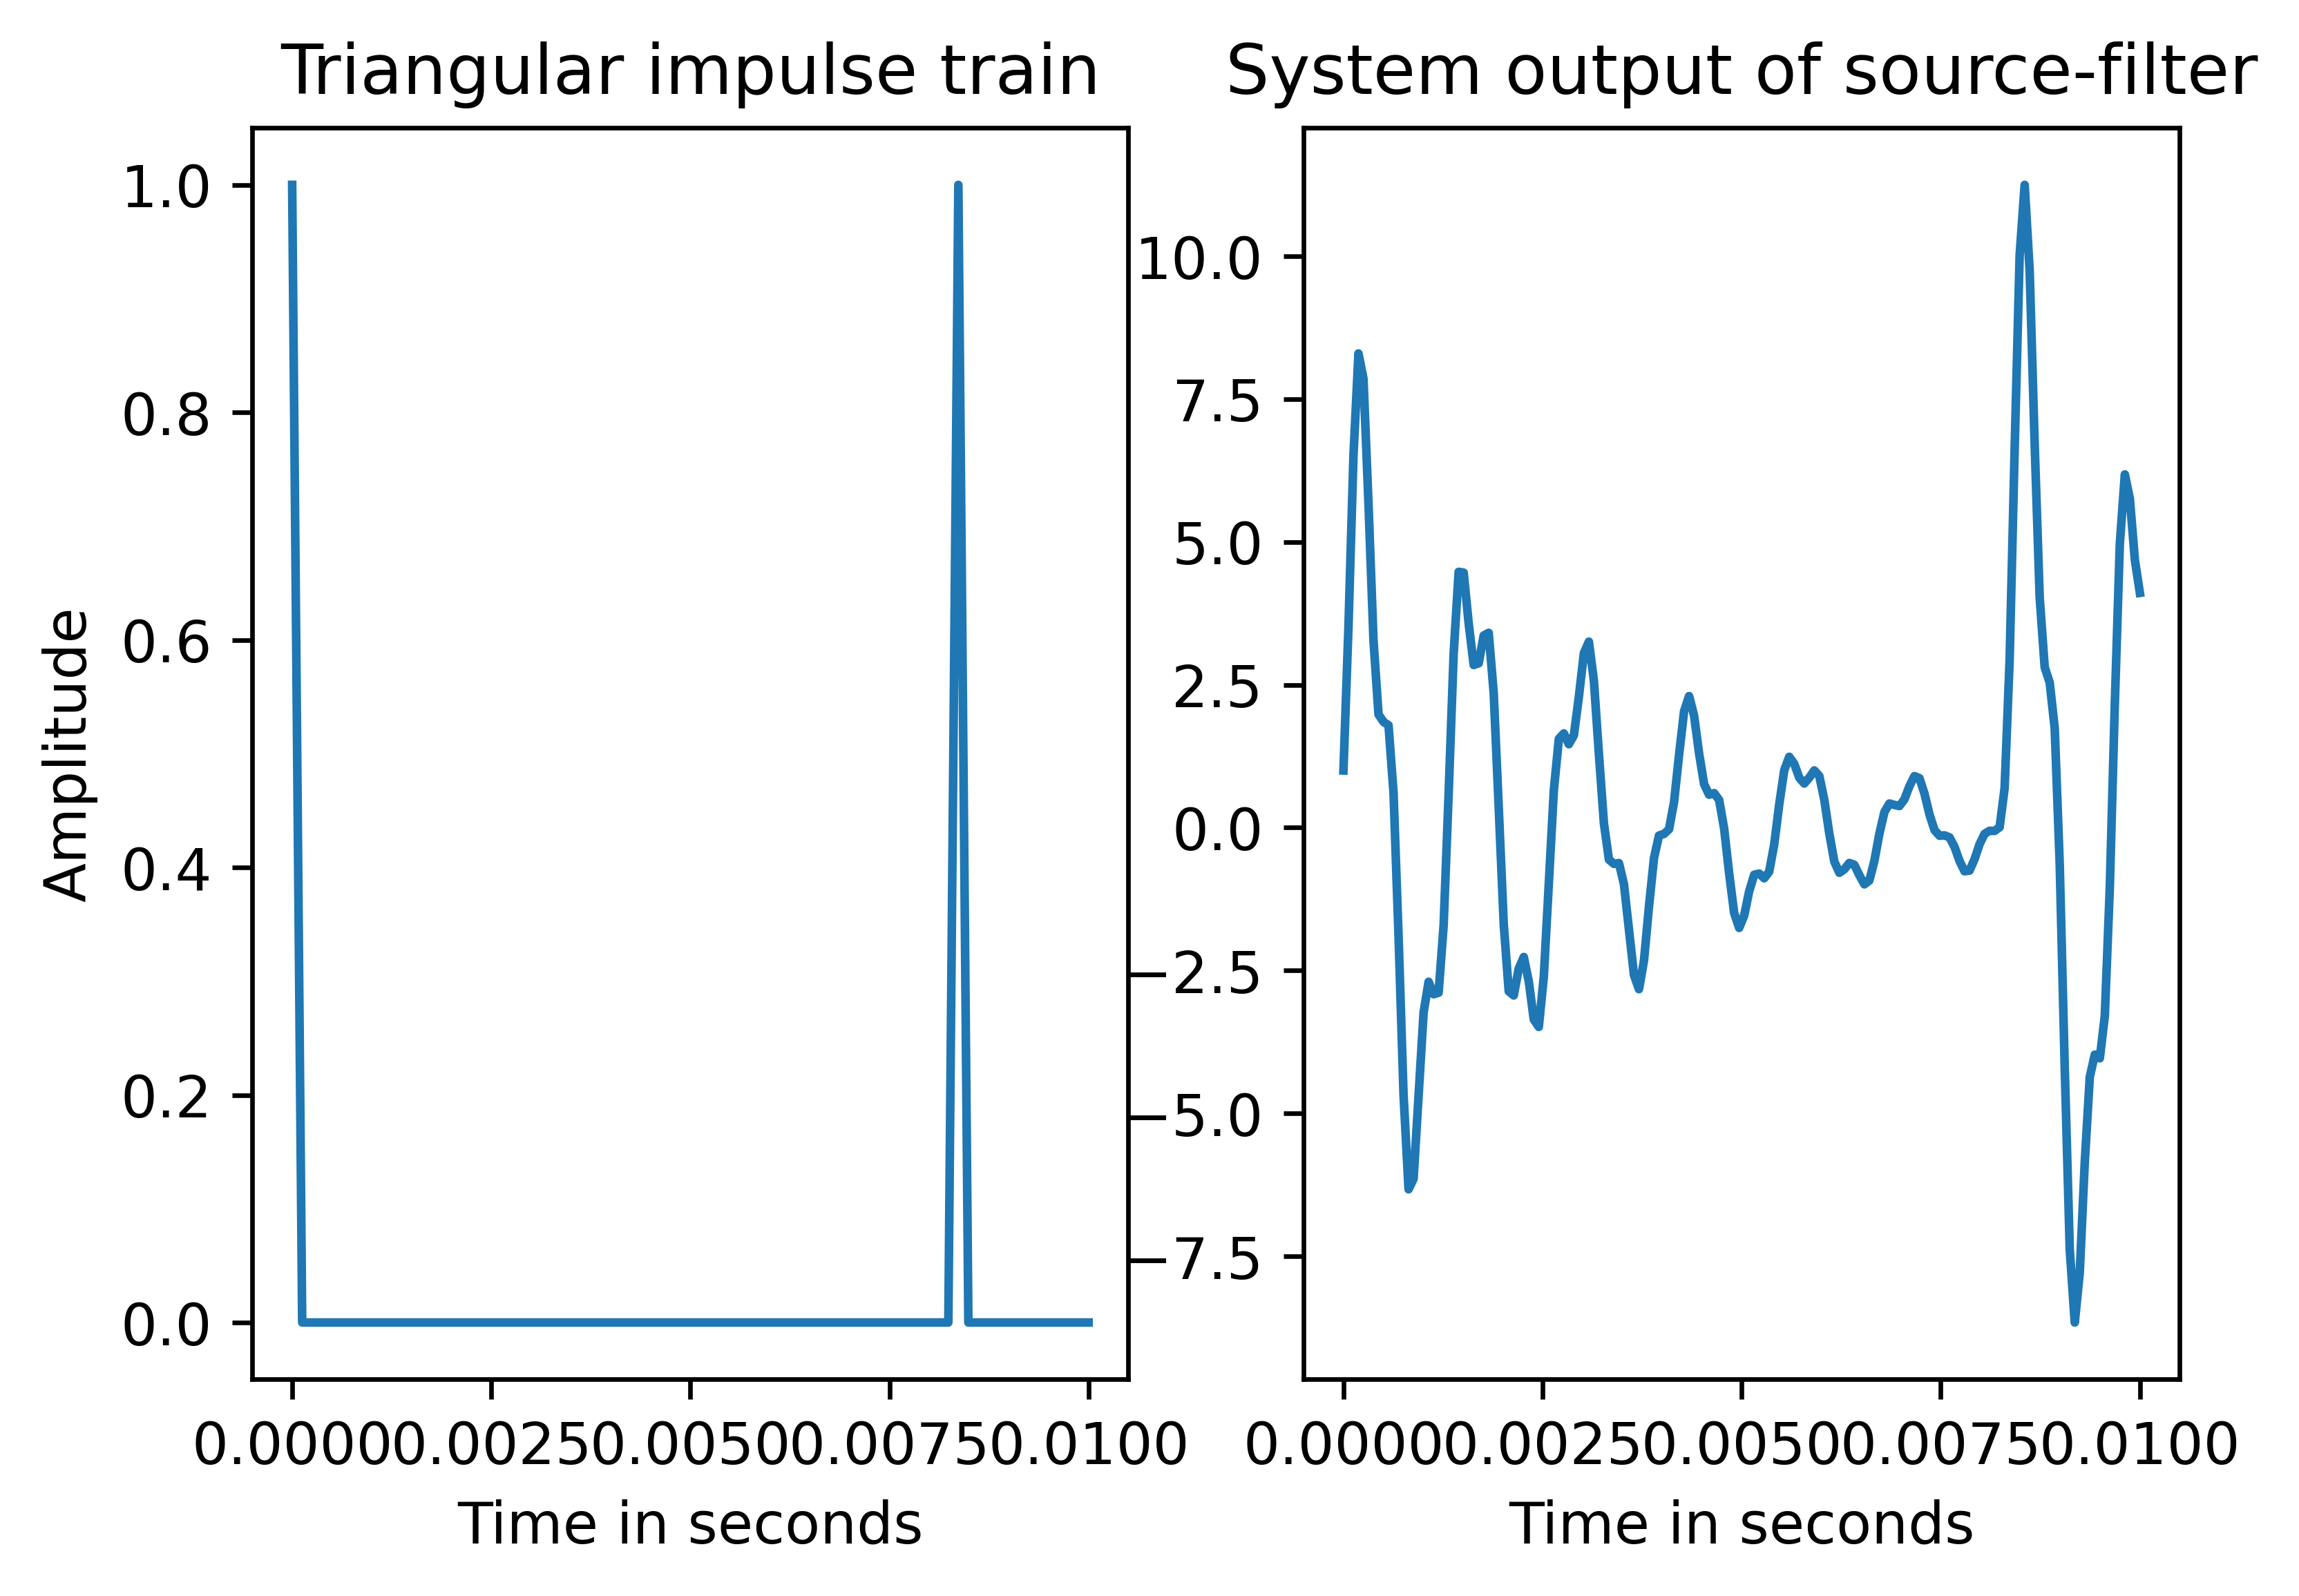

In [230]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")


In [136]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_a_120Hz.wav', fs, scaled)

## /i/ @ 120Hz

In [231]:
f1 = 270 #formant frequency
f2 = 2290
f3 = 3010
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [232]:
F0 = 120
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [233]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [234]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

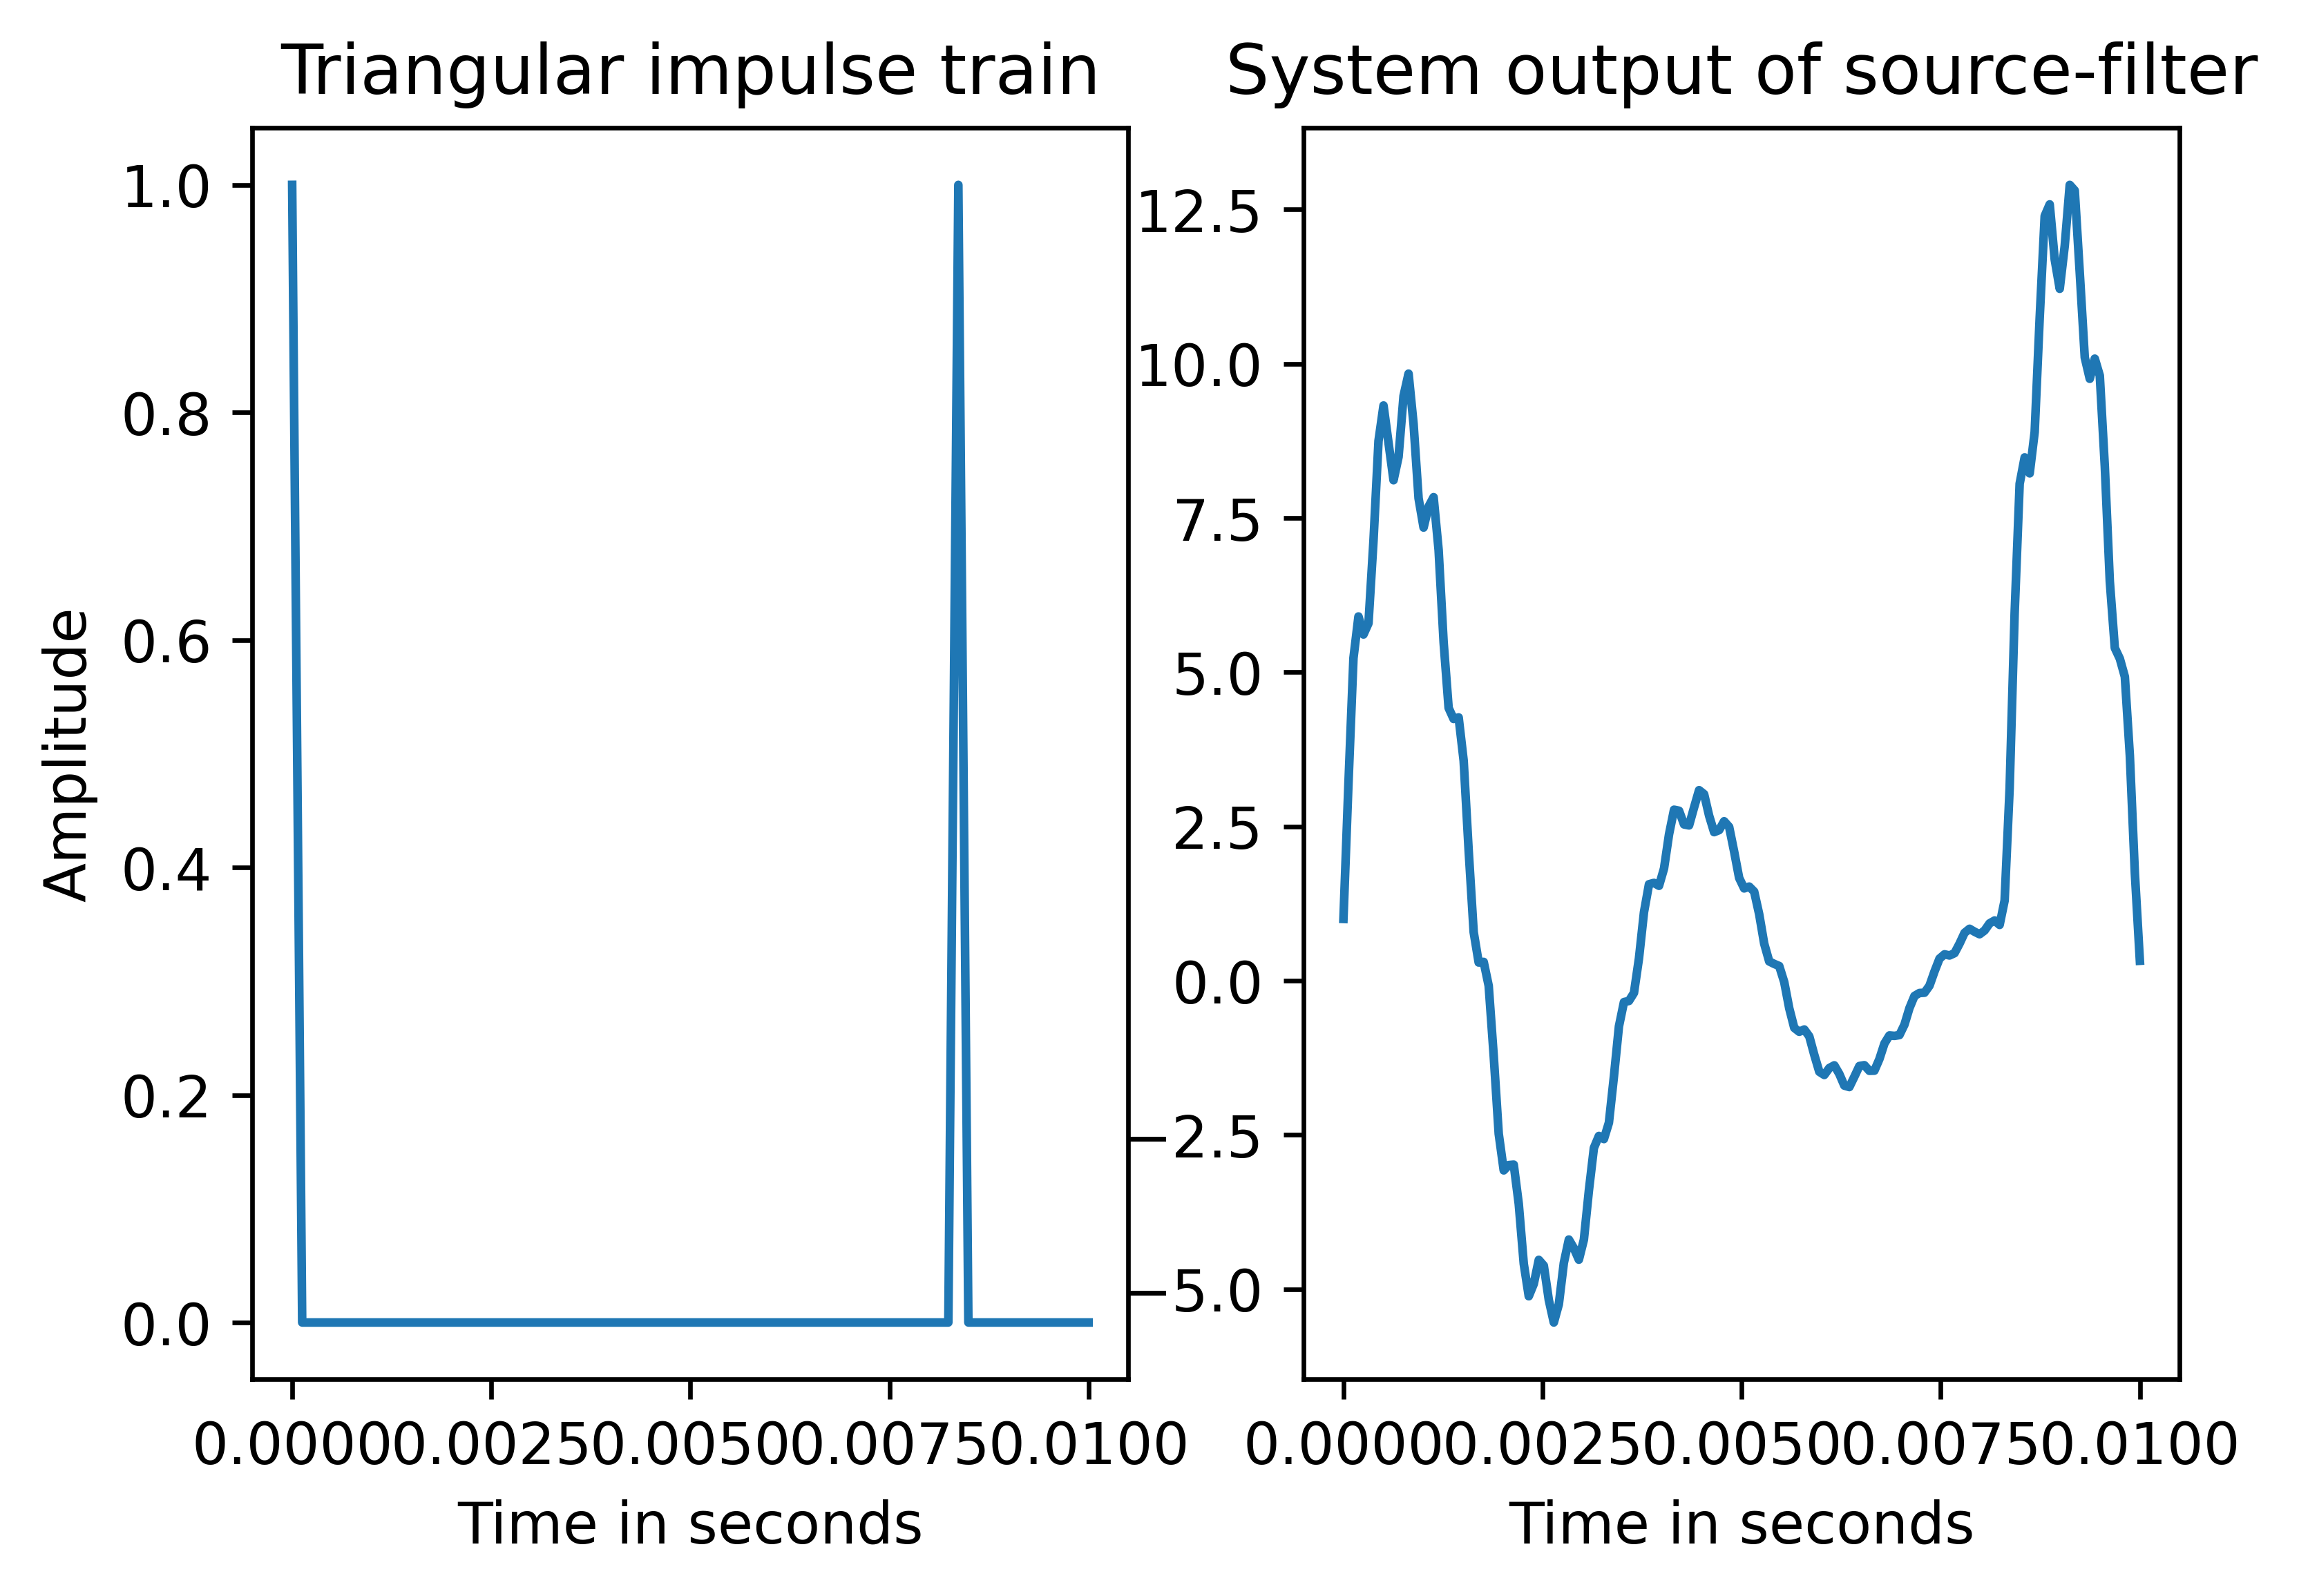

In [235]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [142]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_i_120Hz.wav', fs, scaled)

## /u/ @ 120Hz

In [236]:
f1 = 300 #formant frequency
f2 = 870
f3 = 2240
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [237]:
F0 = 120
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [238]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [239]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

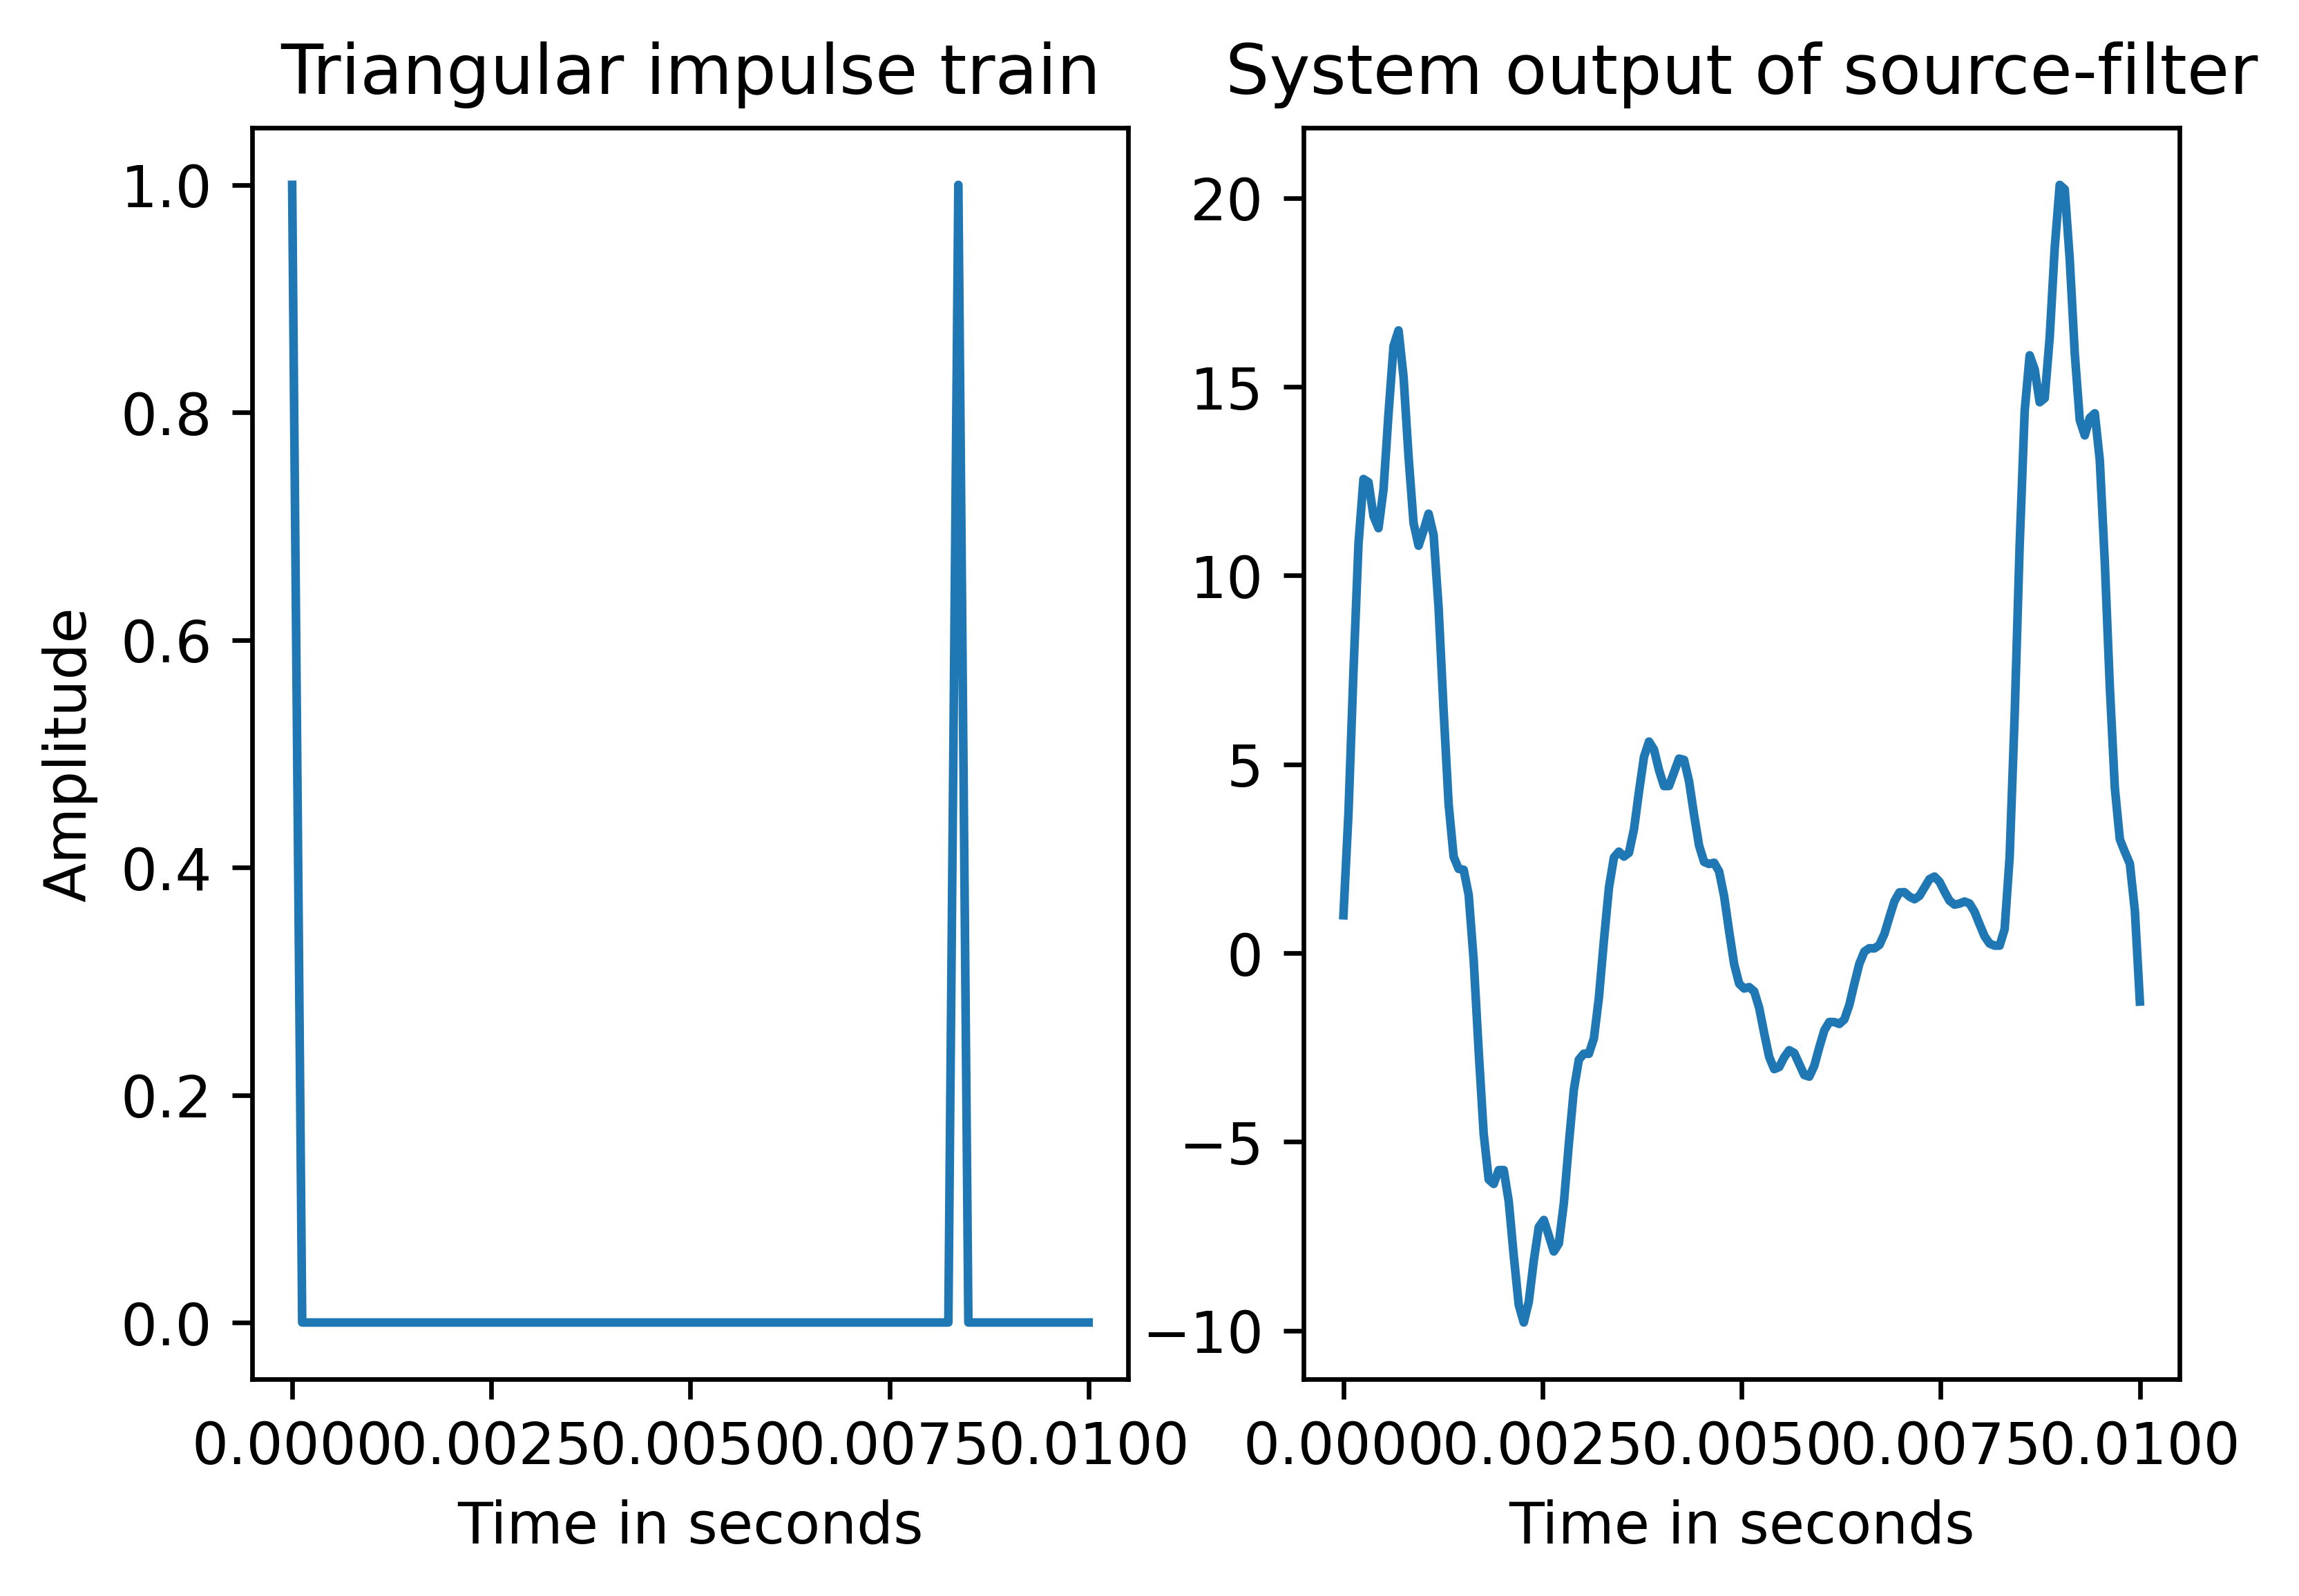

In [240]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [148]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_u_120Hz.wav', fs, scaled)

Now, we go for the high pitch tones

## /a/ @ 220Hz

In [241]:
f1 = 730 #formant frequency
f2 = 1090
f3 = 2440
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [242]:
F0 = 220
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [243]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [244]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

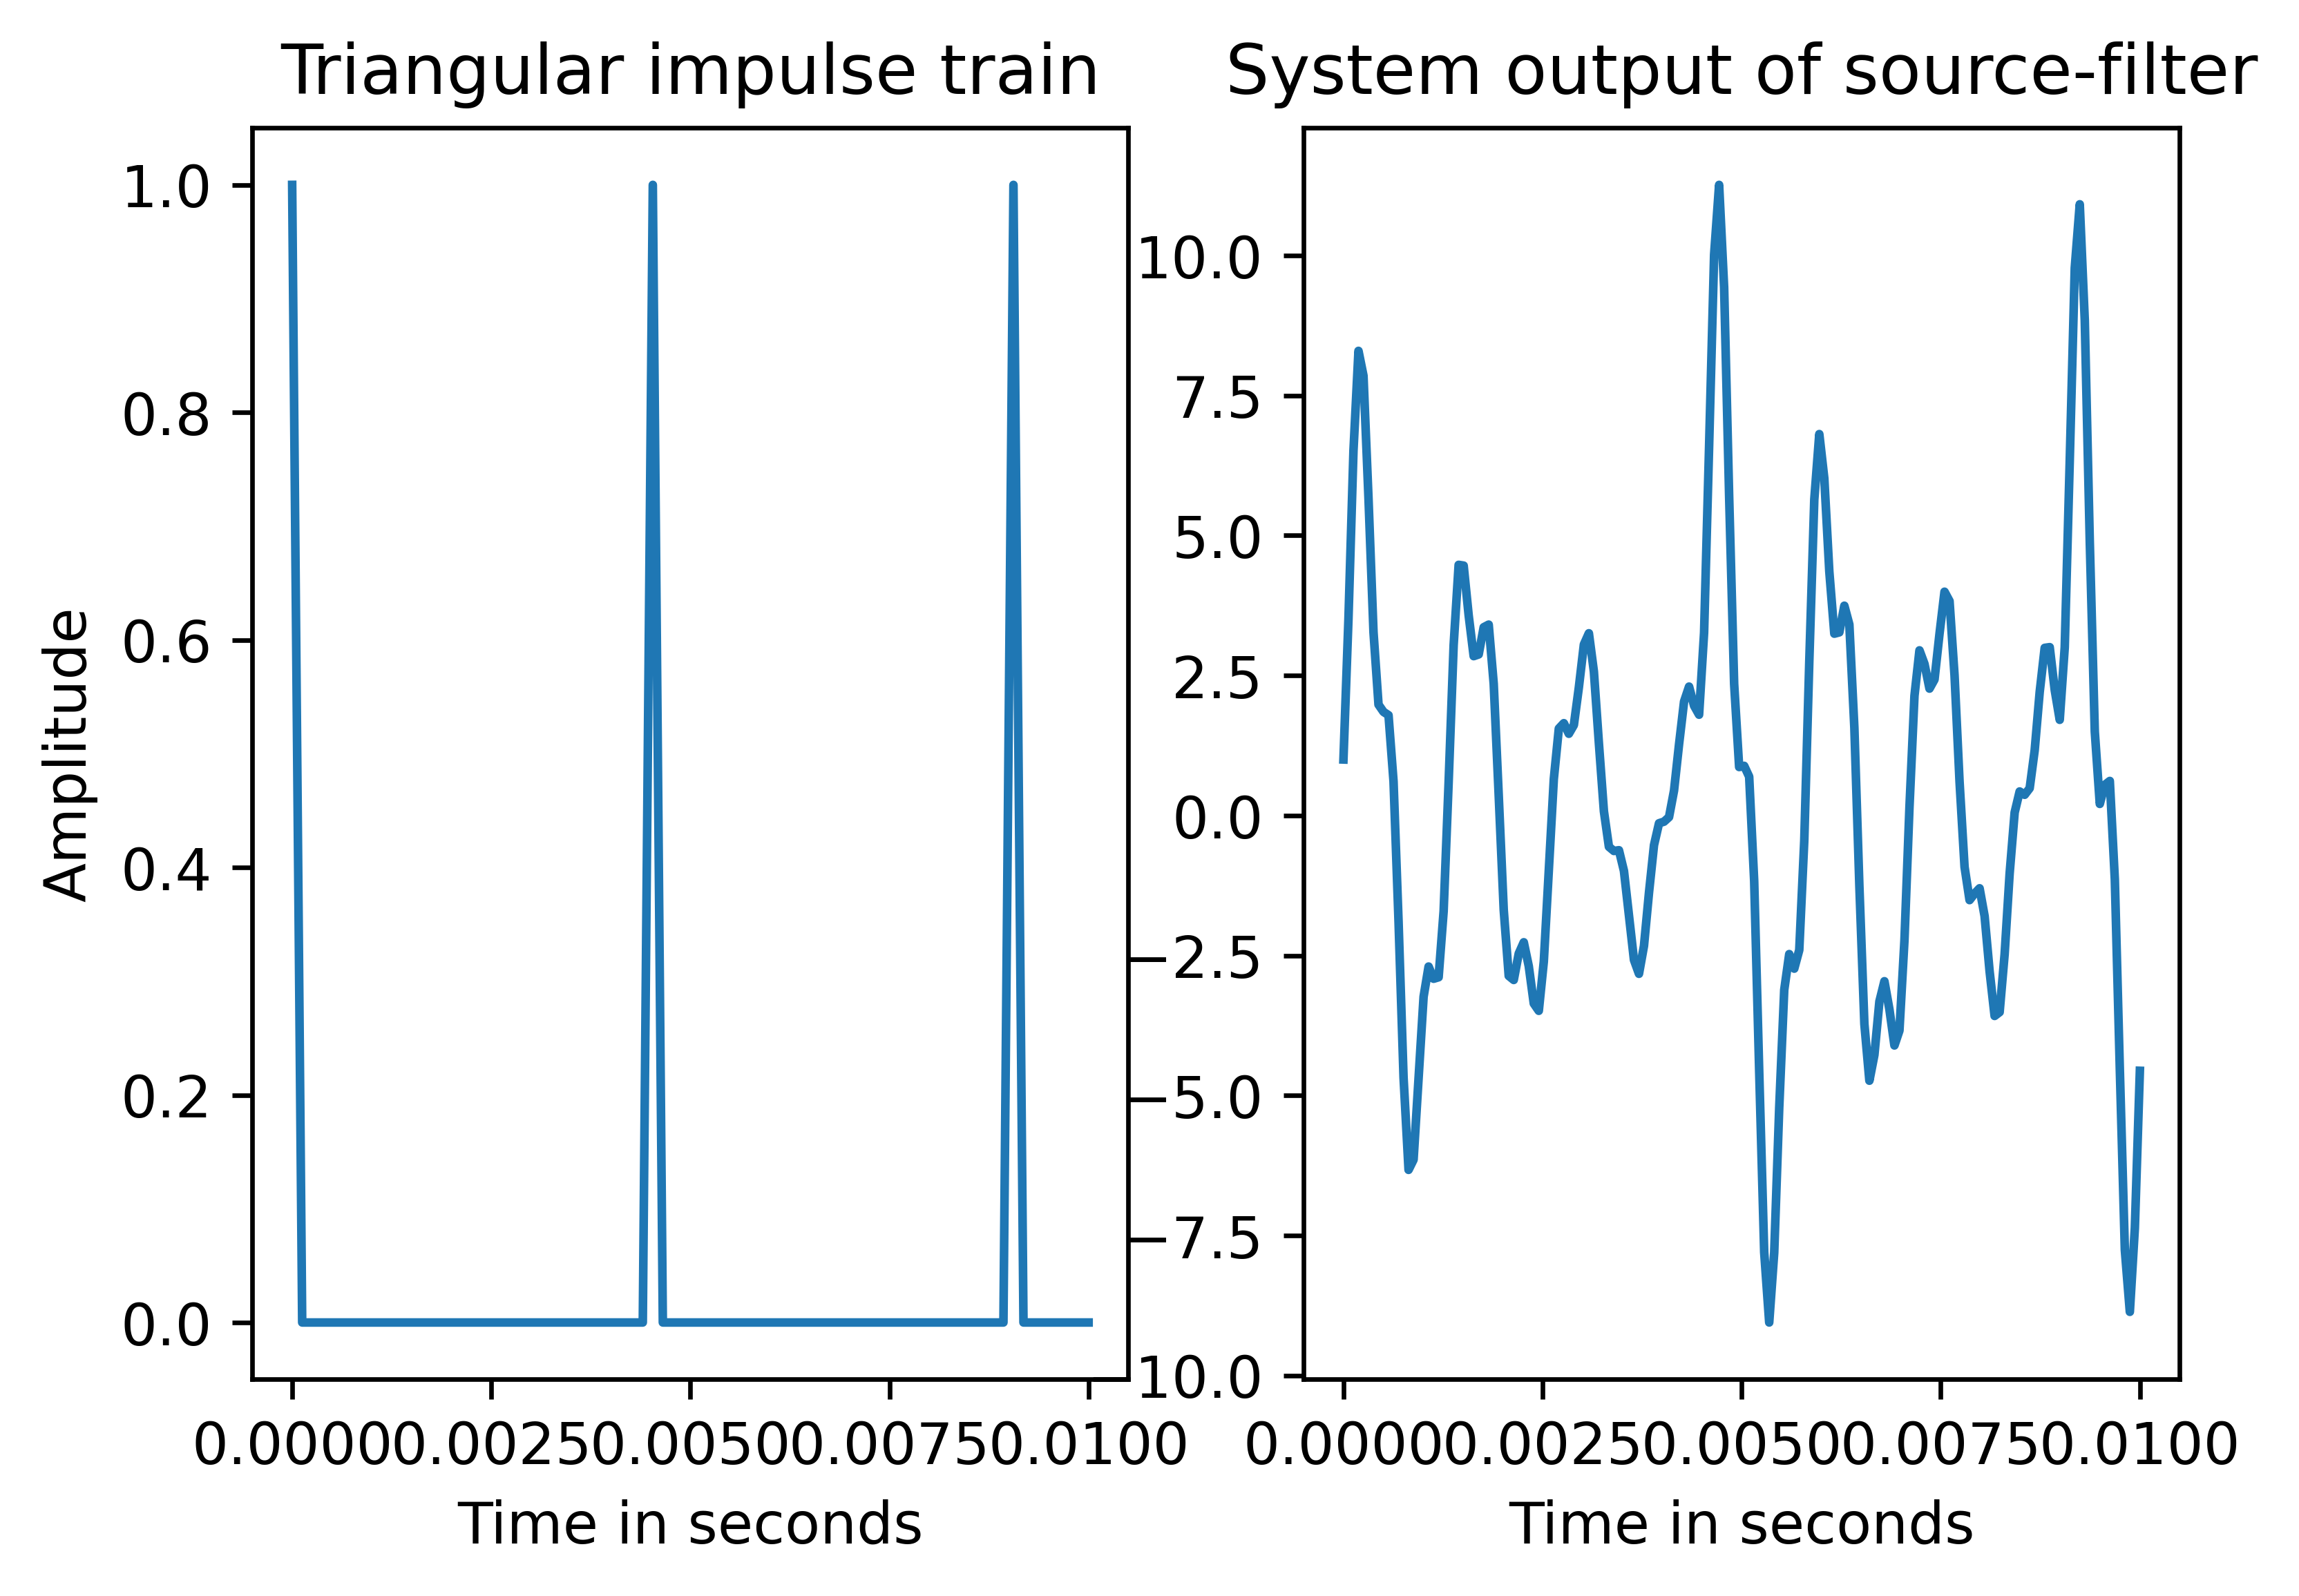

In [245]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [154]:
F0 = 220
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_a_220Hz.wav', fs, scaled)

## /i/ @ 220Hz

In [251]:
f1 = 270 #formant frequency
f2 = 2290
f3 = 3010
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [252]:
F0 = 220
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [253]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [254]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

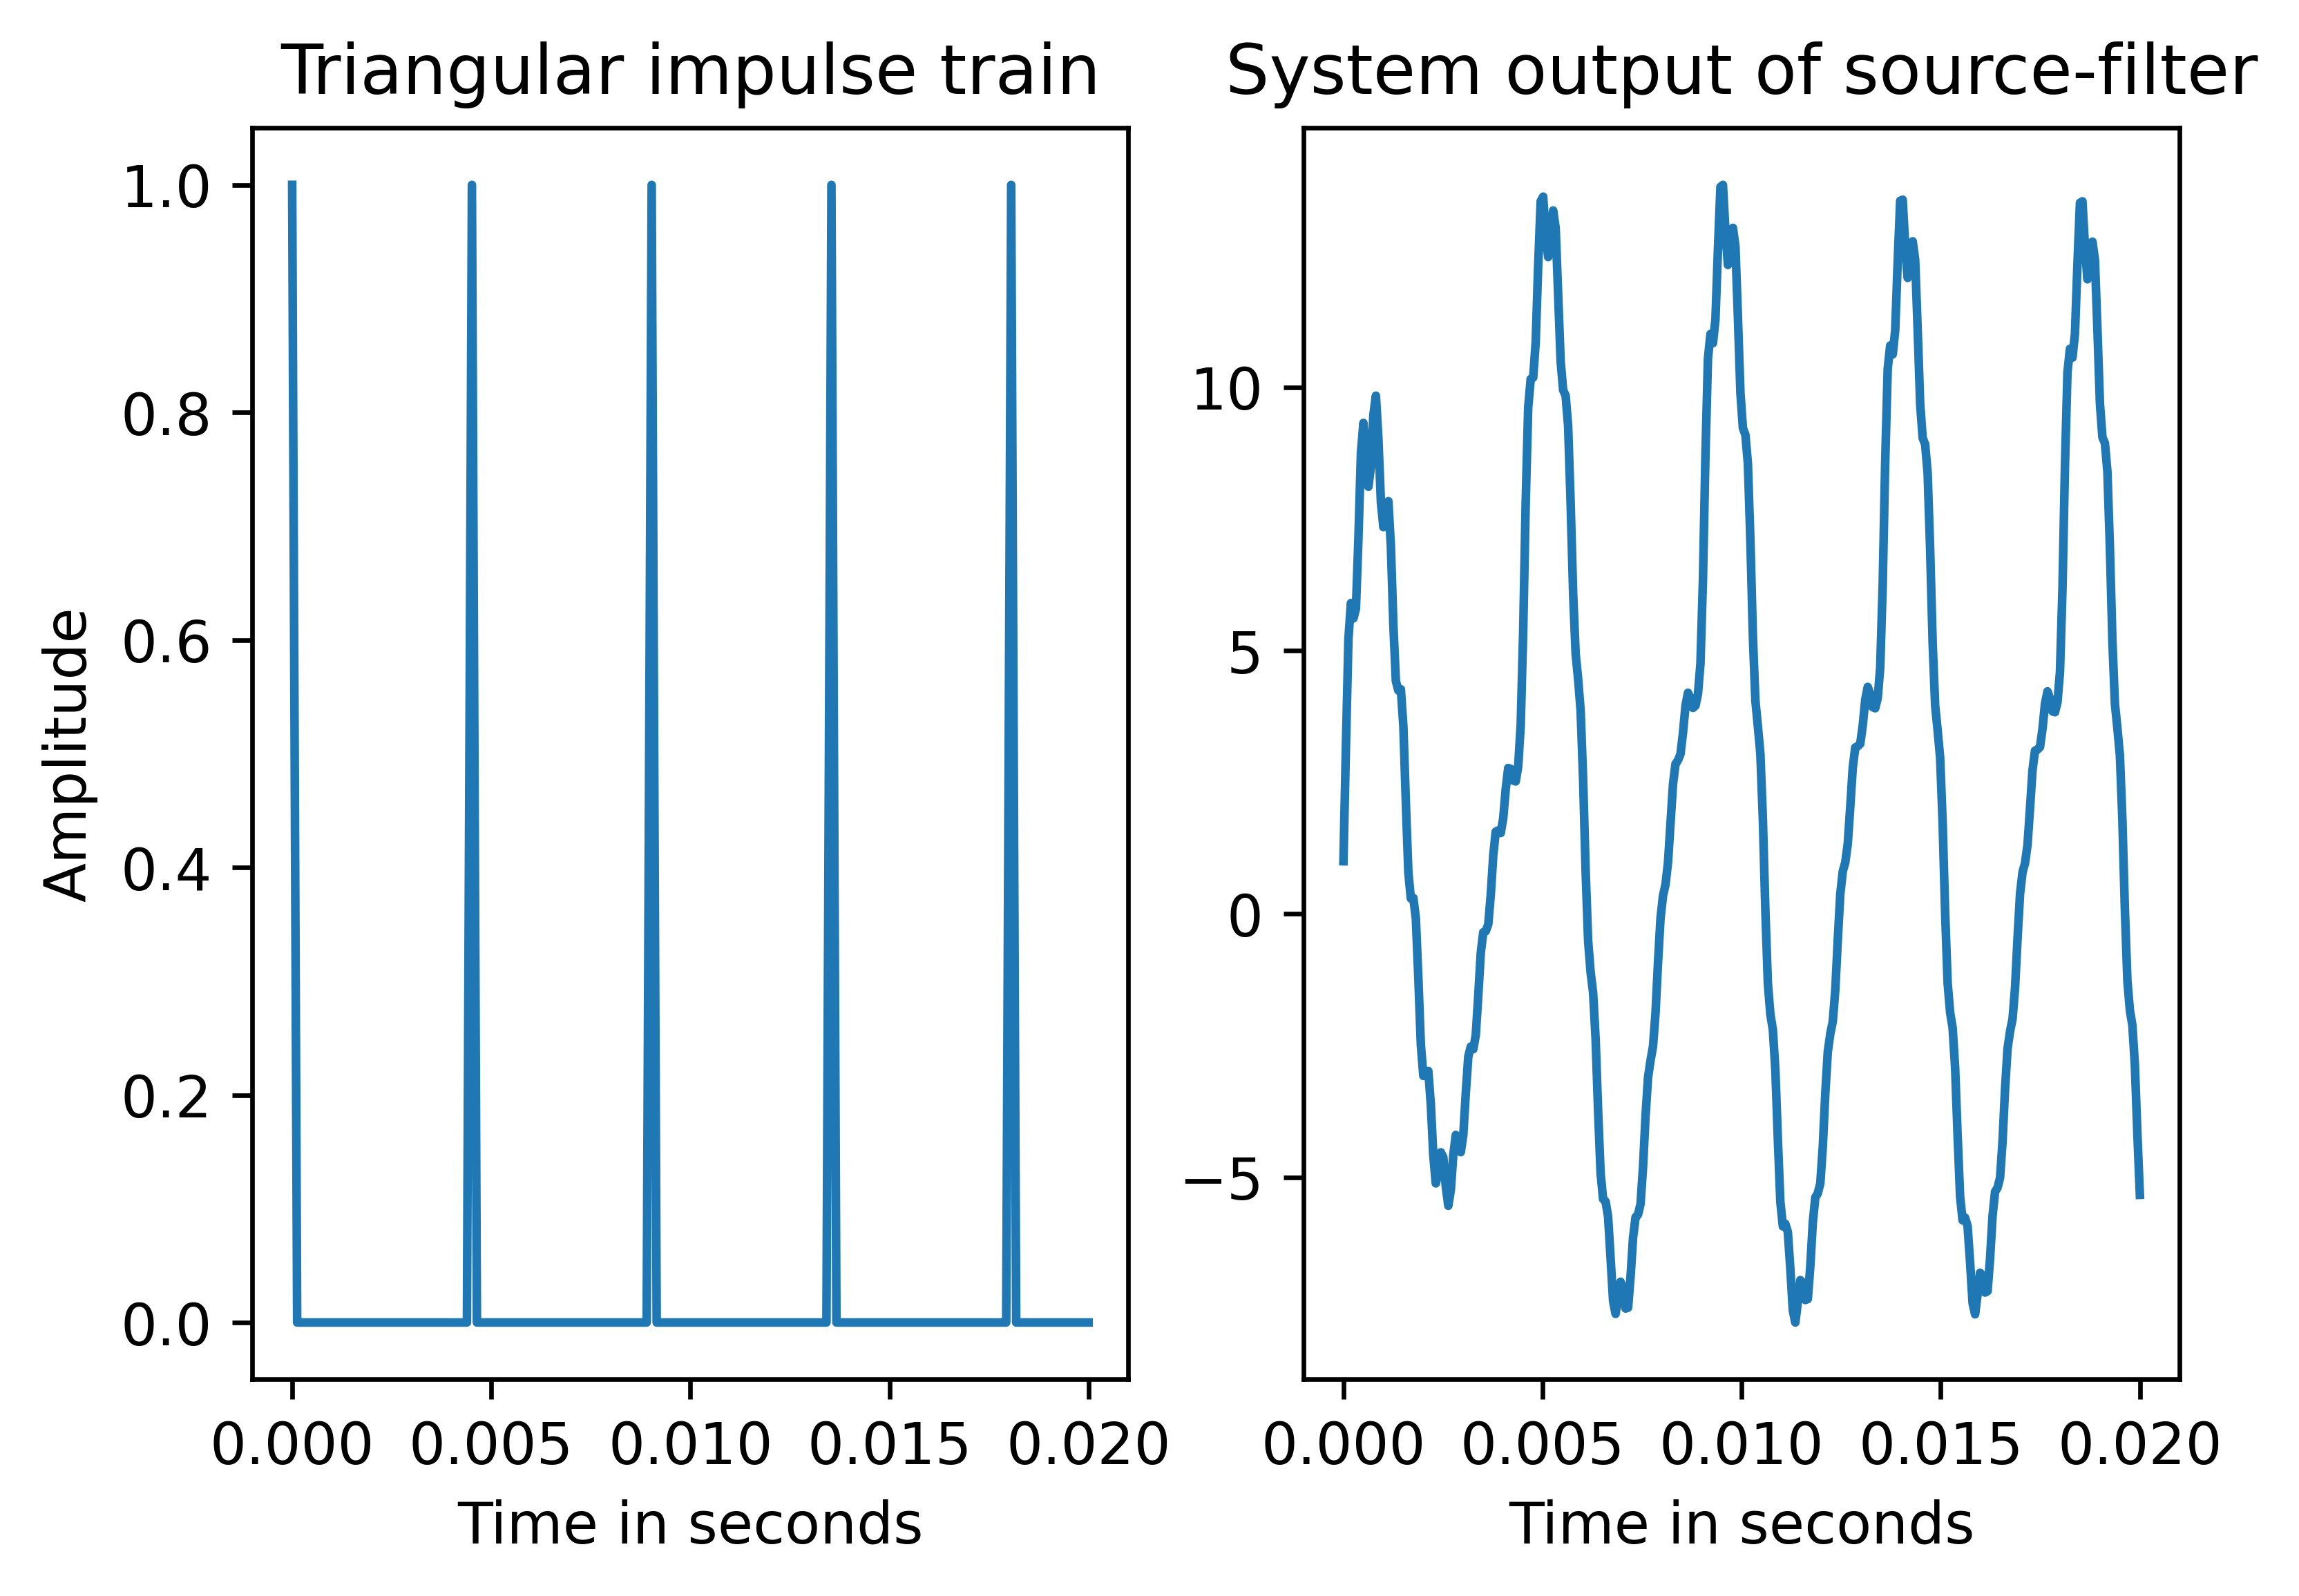

In [255]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [160]:
F0 = 220
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_i_220Hz.wav', fs, scaled)

## /u/ @ 220Hz

In [256]:
f1 = 300 #formant frequency
f2 = 870
f3 = 2240
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [257]:
F0 = 220
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [258]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [259]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

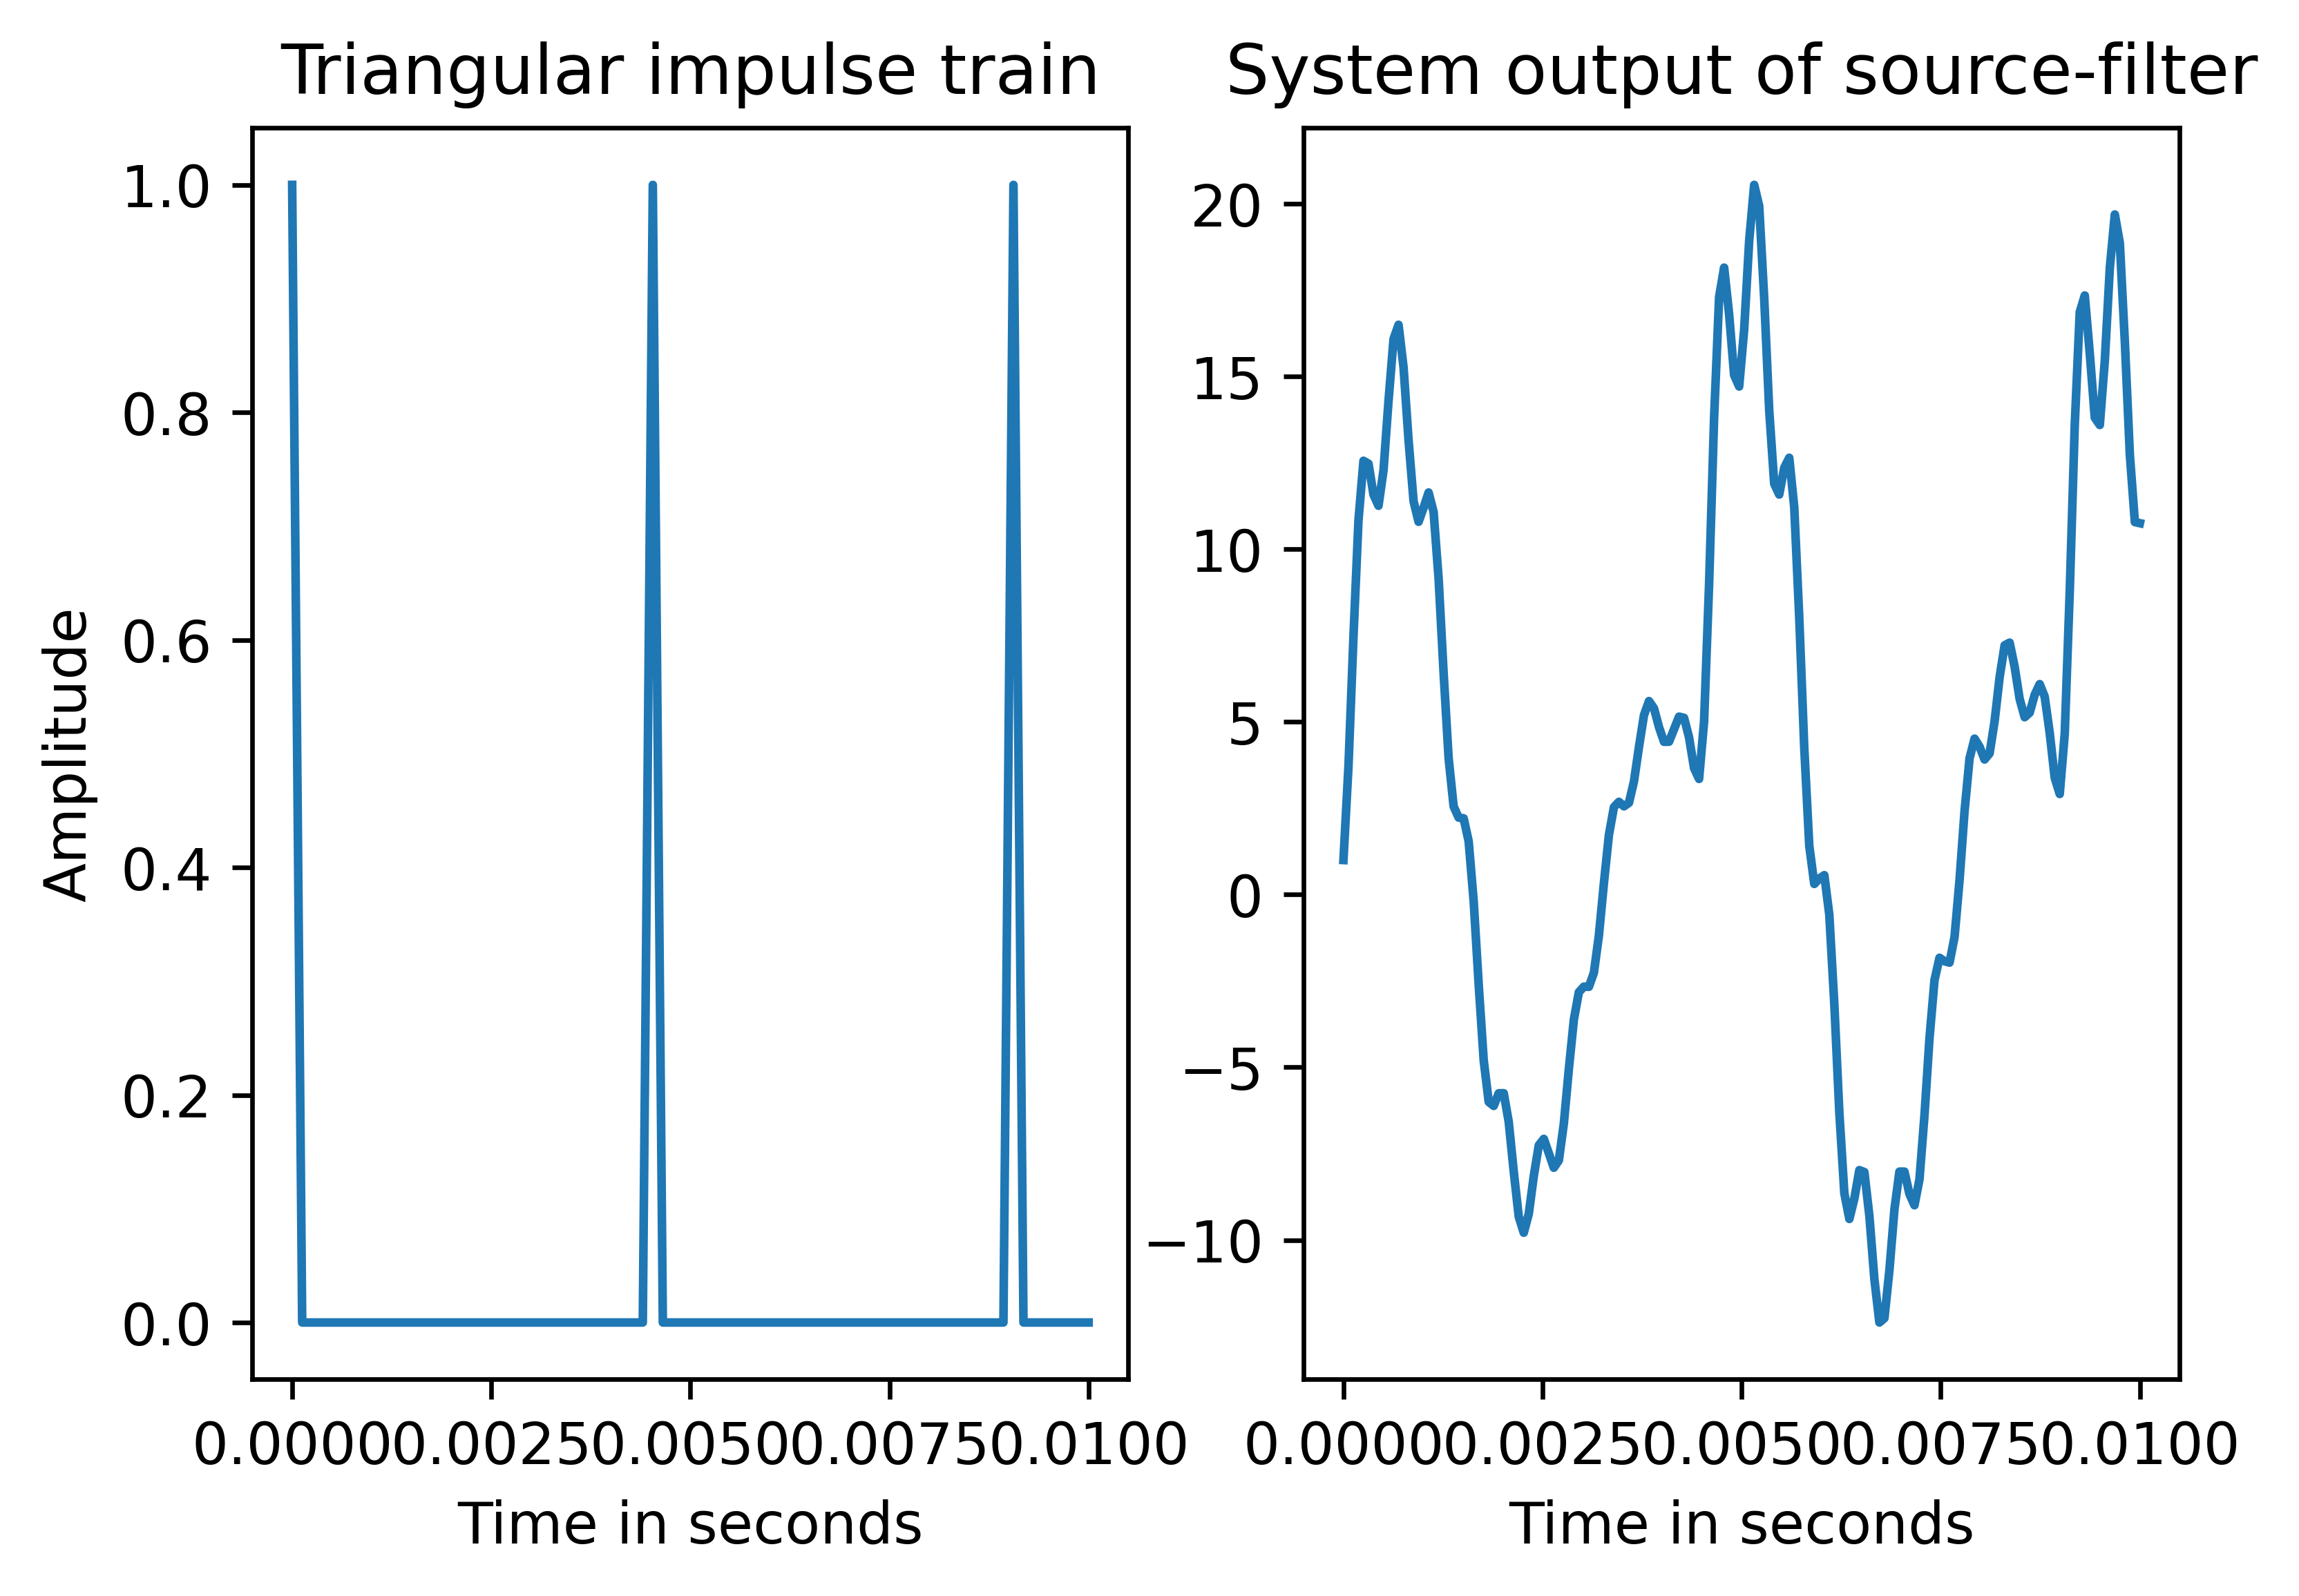

In [260]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [166]:
F0 = 220
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_u_220Hz.wav', fs, scaled)

# Optional part 